# IPL Data Analysis - Exploratory Data Analysis

**Author:** Data Science Student  
**Objective:** Understand IPL cricket through comprehensive data analysis

## 📊 What We'll Explore:
1. **Match Analysis** - How matches are distributed across seasons
2. **Team Performance** - Which teams perform best
3. **Batting Analysis** - Top scorers and their patterns
4. **Bowling Analysis** - Most effective bowlers
5. **Strategic Insights** - Toss impact, venue effects, and match dynamics

This analysis uses simple, readable code that demonstrates fundamental data science techniques.

---
## 0. Setup & Libraries

Let's import all necessary libraries and configure visualization settings.

In [2]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure visualization styles for better-looking plots
sns.set_style('whitegrid')  # Clean background with gridlines
sns.set_palette('husl')     # Pleasant color palette
plt.rcParams['figure.figsize'] = (13, 6)  # Default plot size
plt.rcParams['font.size'] = 10             # Font size for readability

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


---
## 1. Data Loading & Overview

We load the IPL dataset and understand its structure, content, and basic statistics.

In [3]:
# Load the IPL dataset
import kagglehub
from pathlib import Path

# Download latest version
path = kagglehub.dataset_download("chaitu20/ipl-dataset2008-2025")
print("Path to dataset files:", path)

# Read CSV from downloaded folder (instead of hardcoded 'ipl.csv')
dataset_dir = Path(path)
csv_files = sorted(dataset_dir.glob("*.csv"))

if not csv_files:
    raise FileNotFoundError(f"No CSV files found in: {dataset_dir}")

# Prefer a file with 'ipl' in its name; fallback to first CSV
csv_path = next((f for f in csv_files if "ipl" in f.name.lower()), csv_files[0])
print("Using file:", csv_path.name)

ipl = pd.read_csv(csv_path)

# Ensure date column is datetime for correct range reporting
if "date" in ipl.columns:
    ipl["date"] = pd.to_datetime(ipl["date"], errors="coerce")

# Display basic information about the dataset
print("=" * 70)
print("📁 DATASET OVERVIEW")
print("=" * 70)
print(f"\nShape: {ipl.shape[0]:,} rows × {ipl.shape[1]} columns")
print(f"Memory Usage: {ipl.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if "date" in ipl.columns:
    print(f"\nDate Range: {ipl['date'].min()} to {ipl['date'].max()}")

print(f"\nTotal Matches: {ipl['match_id'].nunique()}")
print(f"Total Seasons: {ipl['season'].nunique()}")
print(f"Total Teams: {ipl['batting_team'].nunique()}")
print("\n" + "=" * 70)
print("\nFirst few rows of data:")
ipl.head()

Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\chaitu20\ipl-dataset2008-2025\versions\1
Using file: IPL.csv
📁 DATASET OVERVIEW

Shape: 278,205 rows × 64 columns
Memory Usage: 501.59 MB

Date Range: 2008-04-18 00:00:00 to 2025-06-03 00:00:00

Total Matches: 1169
Total Seasons: 22
Total Teams: 19


First few rows of data:


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False


### Understanding Our Data

Let's examine the columns, data types, and missing values:

In [4]:
# Check data types and missing values
print("Data Types:")
print(ipl.dtypes)

print("\n" + "="*70)
print("\nMissing Values:")
missing = ipl.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

print("\n" + "="*70)
print("\nBasic Statistics:")
ipl[['runs_batter', 'bowler_wicket', 'runs_extras']].describe().round(2)

Data Types:
Unnamed: 0                   int64
match_id                     int64
date                datetime64[ns]
match_type                  object
event_name                  object
                         ...      
batter_balls                 int64
bowler_wicket                int64
batting_partners            object
next_batter                 object
striker_out                   bool
Length: 64, dtype: object


Missing Values:
extra_type          263072
wicket_kind         264382
player_out          264382
fielders            268192
runs_target         144302
review_batter       277333
team_reviewed       277333
review_decision     277333
umpire              277333
win_outcome           4702
superover_winner    274309
result_type         273503
method              274315
new_batter          264884
next_batter         264884
dtype: int64


Basic Statistics:


,runs_batter,bowler_wicket,runs_extras
count,278205.00,278205.00,278205.00
mean,1.28,0.05,0.07
std,1.65,0.21,0.34
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,1.00,0.00,0.00
75%,1.00,0.00,0.00
max,6.00,1.00,7.00


---
## 2. Data Cleaning & Preparation

We prepare the data for analysis by handling missing values, ensuring correct data types, and removing duplicates.

In [5]:
# Create a working copy of the data
df = ipl.copy()

# Map older team names to current or unified names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Pune Warriors': 'Pune Warriors India',
    'Deccan Chargers': 'Sunrisers Hyderabad' # For win analysis, aligning historical data with current teams
}

# Apply mapping to relevant columns
ipl['batting_team'] = ipl['batting_team'].replace(team_name_mapping)
ipl['bowling_team'] = ipl['bowling_team'].replace(team_name_mapping)
ipl['match_won_by'] = ipl['match_won_by'].replace(team_name_mapping)
ipl['toss_winner'] = ipl['toss_winner'].replace(team_name_mapping)

print("Team names standardized successfully!")
print("\nUnique Team Names after Standardization:")
print(ipl['batting_team'].unique())


# Convert date column to datetime format for time-based analysis
df['date'] = pd.to_datetime(df['date'])

# Check for and handle duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ Duplicates removed. New shape: {df.shape}")

# Fill any missing values in categorical columns
# Handle schema differences safely (your file uses player_out/wicket_kind/fielders)
if 'player_dismissed' not in df.columns:
    df['player_dismissed'] = df['player_out'] if 'player_out' in df.columns else np.nan
df['player_dismissed'] = df['player_dismissed'].fillna('Not Out')

if 'dismissal_kind' not in df.columns:
    df['dismissal_kind'] = df['wicket_kind'] if 'wicket_kind' in df.columns else np.nan

if 'fielder' not in df.columns:
    df['fielder'] = df['fielders'] if 'fielders' in df.columns else np.nan

# Create aliases used later in notebook
if 'runs' not in df.columns and 'runs_batter' in df.columns:
    df['runs'] = df['runs_batter']

if 'extras' not in df.columns and 'runs_extras' in df.columns:
    df['extras'] = df['runs_extras']

if 'wickets' not in df.columns and 'bowler_wicket' in df.columns:
    df['wickets'] = df['bowler_wicket']

if 'winning_team' not in df.columns and 'match_won_by' in df.columns:
    df['winning_team'] = df['match_won_by']
df['dismissal_kind'] = df['dismissal_kind'].fillna('Not Applicable')
df['fielder'] = df['fielder'].fillna('N/A')

# Create useful derived columns for analysis
# Total runs including extras in each ball
df['runs_total'] = df['runs'] + df['extras']

# Identify whether a delivery resulted in a wicket
df['is_wicket'] = df['wickets'].apply(lambda x: 1 if x > 0 else 0)

print("\n✅ Data cleaning complete!")
print(f"Final dataset shape: {df.shape}")

# Create team_matches_won dataframe
team_matches_won = (
    ipl.groupby('match_won_by')['match_id']
      .nunique()
      .reset_index(name='matches_won')
      .rename(columns={'match_won_by': 'team'})
      .sort_values('matches_won', ascending=False)
)
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Pune Warriors': 'Pune Warriors India',
    'Deccan Chargers': 'Sunrisers Hyderabad' # For win analysis, aligning historical data with current teams
}

# Define IPL team colors dictionary
ipl_colors = {
    "Mumbai Indians": "#004BA0",              # Official Blue
    "Chennai Super Kings": "#FFFF00",        # Official Yellow
    "Kolkata Knight Riders": "#3A225D",      # Official Purple
    "Royal Challengers Bangalore": "#EC1C24",# Official Red
    "Royal Challengers Bengaluru": "#EC1C24",# New name same color
    "Rajasthan Royals": "#FF69B4",           # Official Pink
    "Sunrisers Hyderabad": "#FF822A",        # Official Orange
    "Kings XI Punjab": "#DD1F2D",            # Official Red
    "Punjab Kings": "#DD1F2D",               # Same franchise new name
    "Delhi Daredevils": "#004C93",           # Official Blue
    "Delhi Capitals": "#004C93",             # Official Blue
    "Gujarat Titans": "#1C1C1C",             # Official Dark Navy/Black
    "Lucknow Super Giants": "#00AEEF",       # Official Cyan Blue
    "Deccan Chargers": "#4253A3",            # Official Blue
    "Gujarat Lions": "#F47920",              # Official Orange
    "Pune Warriors India": "#2B4593",              # Official Blue
    "Rising Pune Supergiant": "#6A1B9A",     # Official Purple
    "Rising Pune Supergiants": "#6A1B9A",    # Same team alt name
    "Kochi Tuskers Kerala": "#800080",       # Official Purple
    "Unknown": "#808080"                     # Neutral Grey
}


Team names standardized successfully!

Unique Team Names after Standardization:
['Kolkata Knight Riders' 'Royal Challengers Bengaluru'
 'Chennai Super Kings' 'Punjab Kings' 'Rajasthan Royals' 'Delhi Capitals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kochi Tuskers Kerala'
 'Pune Warriors India' 'Rising Pune Supergiant' 'Gujarat Lions'
 'Lucknow Super Giants' 'Gujarat Titans']
Duplicate rows found: 0

✅ Data cleaning complete!
Final dataset shape: (278205, 72)


---
## 3. Match Analysis

Let's analyze how IPL matches are distributed across seasons and understand basic match statistics.

### 3.1 Matches Per Season

How many matches were played in each IPL season?

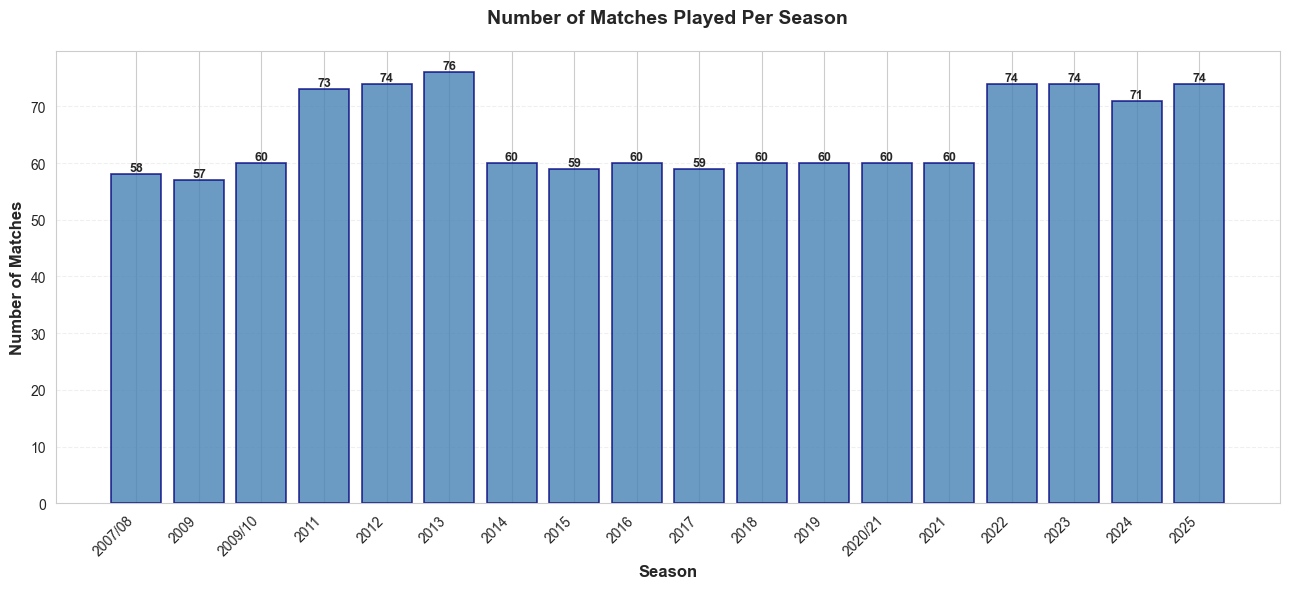


📊 KEY INSIGHT:
- Average matches per season: 65
- Season with most matches: 2013 (76 matches)
- The consistency in match count shows IPL's stable league structure.


In [6]:
# Count matches played in each season
# We get unique match_id for each season to avoid counting the same match twice
# Convert season to string first to avoid mixed-type sorting errors (str vs int)
matches_per_season = (
    df.groupby(df['season'].astype(str))['match_id']
      .nunique()
      .sort_index(
          key=lambda idx: idx.str.extract(r'(\d{4})', expand=False).fillna('0').astype(int)
      )
)

# Create a professional-looking bar chart
fig, ax = plt.subplots(figsize=(13, 6))

x_pos = np.arange(len(matches_per_season), dtype=float)
heights = matches_per_season.astype("int64").to_numpy()

bars = ax.bar(
    x=x_pos,
    height=heights,
    color='steelblue',
    edgecolor='navy',
    alpha=0.8,
    linewidth=1.2
)

# Add value labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configure labels and title
ax.set_xlabel('Season', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Matches', fontsize=12, fontweight='bold')
ax.set_title('Number of Matches Played Per Season', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(len(matches_per_season)))
ax.set_xticklabels(matches_per_season.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print insights
print("\n📊 KEY INSIGHT:")
print(f"- Average matches per season: {matches_per_season.mean():.0f}")
print(f"- Season with most matches: {matches_per_season.idxmax()} ({matches_per_season.max()} matches)")
print(f"- The consistency in match count shows IPL's stable league structure.")

---
## 4. Team Analysis

Let's examine which teams perform best and their overall statistics across all seasons.

### 4.1 Total Wins by Team

Which teams have won the most matches?

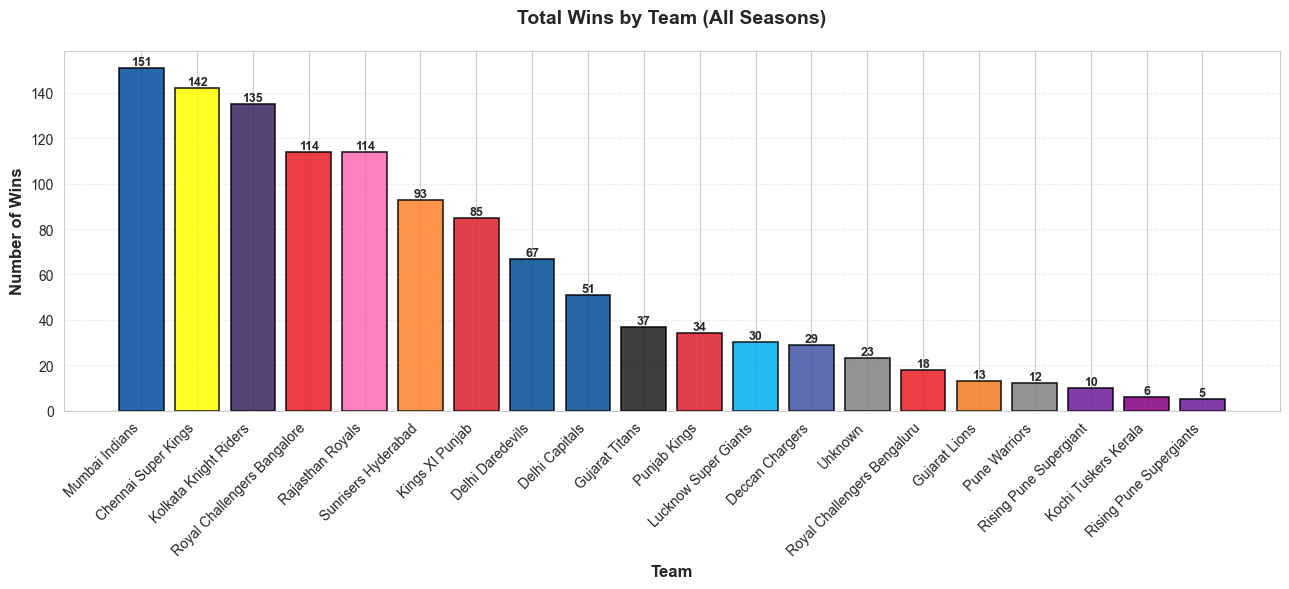


📊 KEY INSIGHTS:
- Most successful team: Mumbai Indians with 151 wins
- Teams show varied success, reflecting different management strategies.
- Consistent top performers indicate strong organizational capabilities.


In [7]:
# Get unique matches to avoid double counting
# Each match appears twice in deliveries data (once per team)
matches_unique = df.drop_duplicates(subset=['match_id'])[['match_id', 'season', 'winning_team']]

# Count wins by team
team_wins = matches_unique['winning_team'].value_counts().sort_values(ascending=False)

# Create visualization
fig, ax = plt.subplots(figsize=(13, 6))

x = np.arange(len(team_wins), dtype=float)
y = team_wins.to_numpy(dtype=float)

bar_colors = [ipl_colors.get(team, ipl_colors['Unknown']) for team in team_wins.index]

bars = ax.bar(
    x,
    y,
    color=bar_colors,
    edgecolor='black',
    alpha=0.85,
    linewidth=1.2
)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Styling
ax.set_xlabel('Team', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Wins', fontsize=12, fontweight='bold')
ax.set_title('Total Wins by Team (All Seasons)', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(len(team_wins)))
ax.set_xticklabels(team_wins.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print insights
print("\n📊 KEY INSIGHTS:")
print(f"- Most successful team: {team_wins.index[0]} with {team_wins.values[0]} wins")
print(f"- Teams show varied success, reflecting different management strategies.")
print(f"- Consistent top performers indicate strong organizational capabilities.")

### 4.2 Win Percentage by Team

Which team has the highest winning percentage? This accounts for different total matches played.

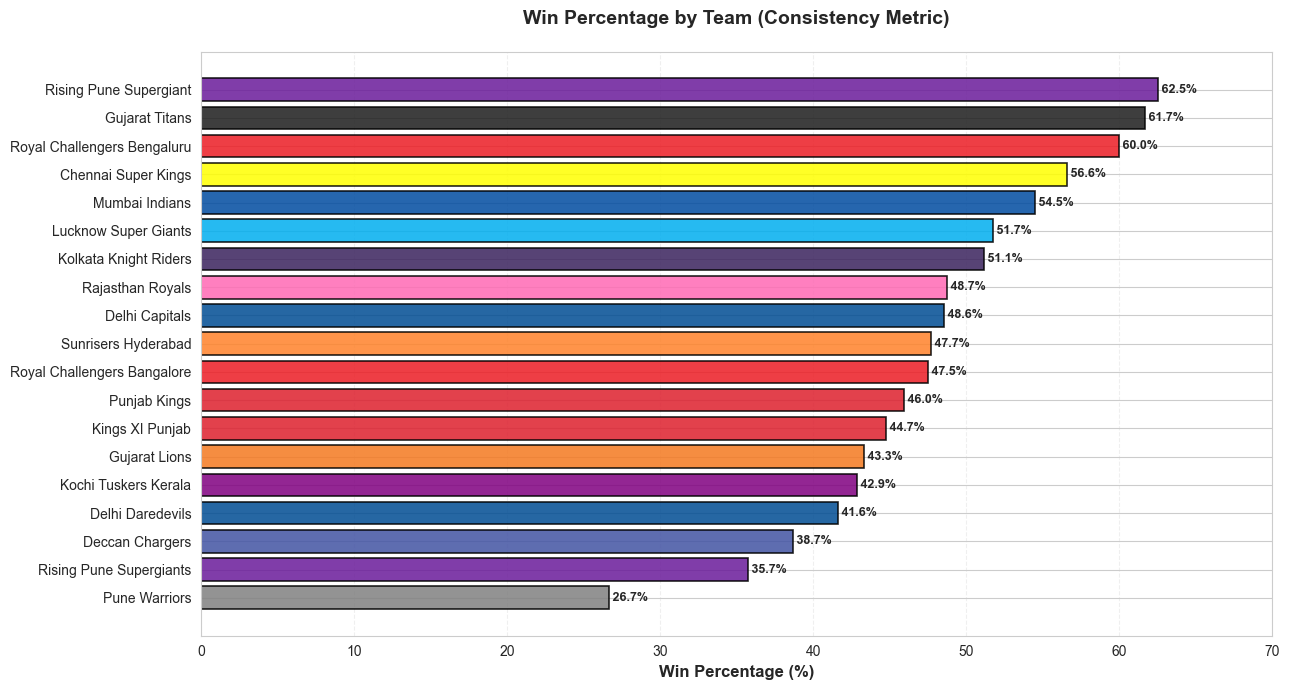


📊 KEY INSIGHTS:
- Best performing team: Rising Pune Supergiant (62.5% win rate)
- Win percentage shows true team consistency, independent of total matches.
- Strong teams maintain 50%+ win rates over long periods.


In [8]:
# Calculate matches played by each team
# A team plays when they are batting_team (we count unique matches)
team_matches = df.groupby('batting_team')['match_id'].nunique().reset_index()
team_matches.columns = ['team', 'matches_played']

# Calculate wins for each team
team_wins_list = matches_unique['winning_team'].value_counts().reset_index()
team_wins_list.columns = ['team', 'wins']

# Merge to calculate win percentage
team_performance = team_matches.merge(team_wins_list, on='team', how='left')
team_performance['wins'] = team_performance['wins'].fillna(0).astype(int)
team_performance['win_percentage'] = (team_performance['wins'] / team_performance['matches_played'] * 100).round(2)
team_performance = team_performance.sort_values('win_percentage', ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(13, 7))

bar_colors = [ipl_colors.get(team, ipl_colors['Unknown']) for team in team_performance['team']]

bars = ax.barh(
    team_performance['team'],
    team_performance['win_percentage'],
    color=bar_colors,
    edgecolor='black',
    alpha=0.85,
    linewidth=1.2
)

# Add percentage labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {width:.1f}%',
            ha='left', va='center', fontsize=9, fontweight='bold')

# Styling
ax.set_xlabel('Win Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Win Percentage by Team (Consistency Metric)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_xlim(0, 70)

plt.tight_layout()
plt.show()

# Print insights
top_team = team_performance.iloc[-1]
print("\n📊 KEY INSIGHTS:")
print(f"- Best performing team: {top_team['team']} ({top_team['win_percentage']:.1f}% win rate)")
print(f"- Win percentage shows true team consistency, independent of total matches.")
print(f"- Strong teams maintain 50%+ win rates over long periods.")

---
## 5. Batting Analysis

Let's examine individual batting performances and identify top scorers.

### 5.1 Top Run Scorers

Who are the highest run scorers in IPL history?

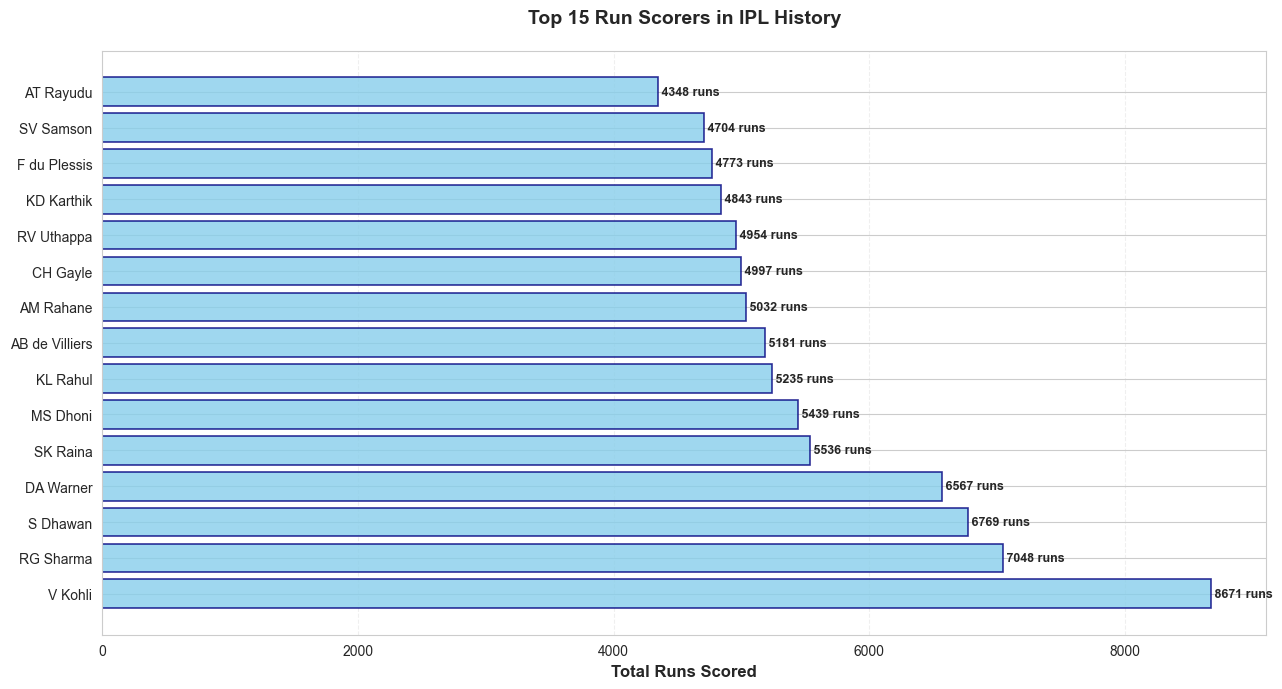


📊 KEY INSIGHTS:
- Top scorer: V Kohli with 8671 runs
- Top run scorers play consistently across multiple seasons.
- High run accumulation reflects experience, skill, and opportunity.


In [9]:
# Calculate total runs scored by each batsman
# We sum the 'runs' column (actual runs scored by batsman, excluding extras)
top_scorers = df.groupby('batter')['runs'].sum().sort_values(ascending=False).head(15)

# Create visualization
fig, ax = plt.subplots(figsize=(13, 7))

# Use explicit NumPy arrays to avoid ArrayLike/ExtensionArray type issues
y_pos = np.arange(len(top_scorers), dtype=float)
run_vals = top_scorers.to_numpy(dtype=float)

bars = ax.barh(
    y=y_pos,
    width=run_vals,
    color='skyblue',
    edgecolor='navy',
    alpha=0.8,
    linewidth=1.2
)

# Add run labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(width)} runs',
            ha='left', va='center', fontsize=9, fontweight='bold')

# Styling
ax.set_yticks(range(len(top_scorers)))
ax.set_yticklabels(top_scorers.index)
ax.set_xlabel('Total Runs Scored', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Run Scorers in IPL History', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print insights
print("\n📊 KEY INSIGHTS:")
print(f"- Top scorer: {top_scorers.index[0]} with {int(top_scorers.values[0])} runs")
print(f"- Top run scorers play consistently across multiple seasons.")
print(f"- High run accumulation reflects experience, skill, and opportunity.")

### 5.2 Batting Strike Rate Analysis

Which batsmen score the fastest (highest strike rate)?

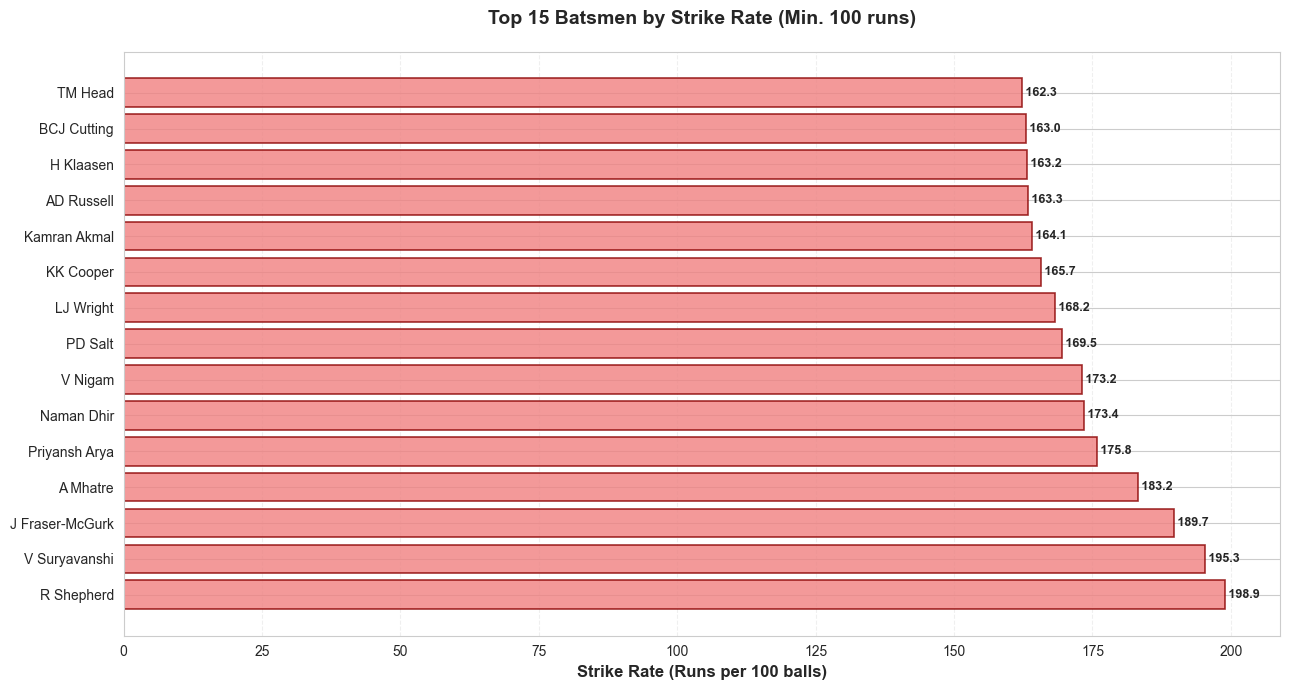


📊 KEY INSIGHTS:
- Highest strike rate: R Shepherd (198.9)
- Strike rate shows how quickly a batsman scores runs.
- Aggressive batting style required for high strike rates in modern T20.


In [10]:
# Calculate strike rate for batsmen with minimum 100 runs
batsman_stats = df.groupby('batter').agg({
    'runs': 'sum',           # Total runs scored
    'batter': 'count'        # Total balls faced
}).reset_index(drop=True)

# Better approach: use proper groupby
batsman_stats = df.groupby('batter').agg({
    'runs': 'sum',
    'match_id': 'count'      # Number of deliveries (balls faced)
}).reset_index()
batsman_stats.columns = ['batter', 'total_runs', 'balls_faced']

# Calculate strike rate
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced'] * 100).round(2)

# Filter for players with at least 100 runs
batsman_stats_filtered = batsman_stats[batsman_stats['total_runs'] >= 100].sort_values('strike_rate', ascending=False).head(15)

# Create visualization
fig, ax = plt.subplots(figsize=(13, 7))

# Use explicit NumPy arrays to avoid ArrayLike/ExtensionArray type issues
y_pos = np.arange(len(batsman_stats_filtered), dtype=float)
strike_vals = batsman_stats_filtered['strike_rate'].to_numpy(dtype=float)

bars = ax.barh(
    y=y_pos,
    width=strike_vals,
    color='lightcoral',
    edgecolor='darkred',
    alpha=0.8,
    linewidth=1.2
)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {width:.1f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

# Styling
ax.set_yticks(range(len(batsman_stats_filtered)))
ax.set_yticklabels(batsman_stats_filtered['batter'])
ax.set_xlabel('Strike Rate (Runs per 100 balls)', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Batsmen by Strike Rate (Min. 100 runs)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print insights
print("\n📊 KEY INSIGHTS:")
print(f"- Highest strike rate: {batsman_stats_filtered.iloc[0]['batter']} ({batsman_stats_filtered.iloc[0]['strike_rate']:.1f})")
print(f"- Strike rate shows how quickly a batsman scores runs.")
print(f"- Aggressive batting style required for high strike rates in modern T20.")

---
## 6. Bowling Analysis

Let's analyze bowling performances and identify top wicket-takers.

### 6.1 Top Wicket Takers

Who has taken the most wickets in IPL?

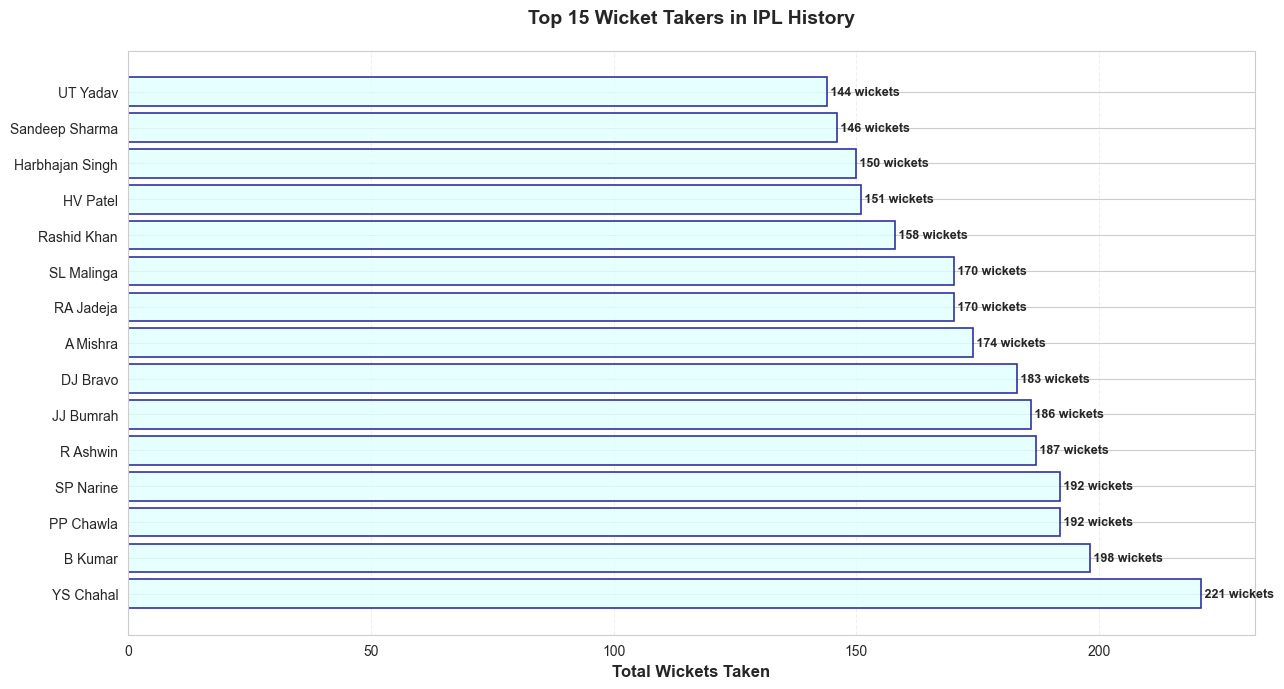


📊 KEY INSIGHTS:
- Top bowler: YS Chahal with 221 wickets
- Consistent wicket-takers are reliable match-winners.
- Bowling consistency over seasons shows skill and experience.


In [11]:
# Count wickets taken by each bowler
# Wickets are recorded in the 'wickets' column
top_wicket_takers = df[df['wickets'] > 0].groupby('bowler')['wickets'].sum().sort_values(ascending=False).head(15)

# Create visualization
fig, ax = plt.subplots(figsize=(13, 7))

# Use NumPy arrays to avoid ArrayLike / ExtensionArray type-check issues
y_pos = np.arange(len(top_wicket_takers), dtype=float)
wicket_vals = top_wicket_takers.to_numpy(dtype=float)

bars = ax.barh(
    y=y_pos,
    width=wicket_vals,
    color='lightcyan',
    edgecolor='darkblue',
    alpha=0.8,
    linewidth=1.2
)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(width)} wickets',
            ha='left', va='center', fontsize=9, fontweight='bold')

# Styling
ax.set_yticks(range(len(top_wicket_takers)))
ax.set_yticklabels(top_wicket_takers.index)
ax.set_xlabel('Total Wickets Taken', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Wicket Takers in IPL History', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print insights
print("\n📊 KEY INSIGHTS:")
print(f"- Top bowler: {top_wicket_takers.index[0]} with {int(top_wicket_takers.values[0])} wickets")
print(f"- Consistent wicket-takers are reliable match-winners.")
print(f"- Bowling consistency over seasons shows skill and experience.")

### 6.2 Bowling Economy Rate

Which bowlers are most economical (give away fewest runs)?

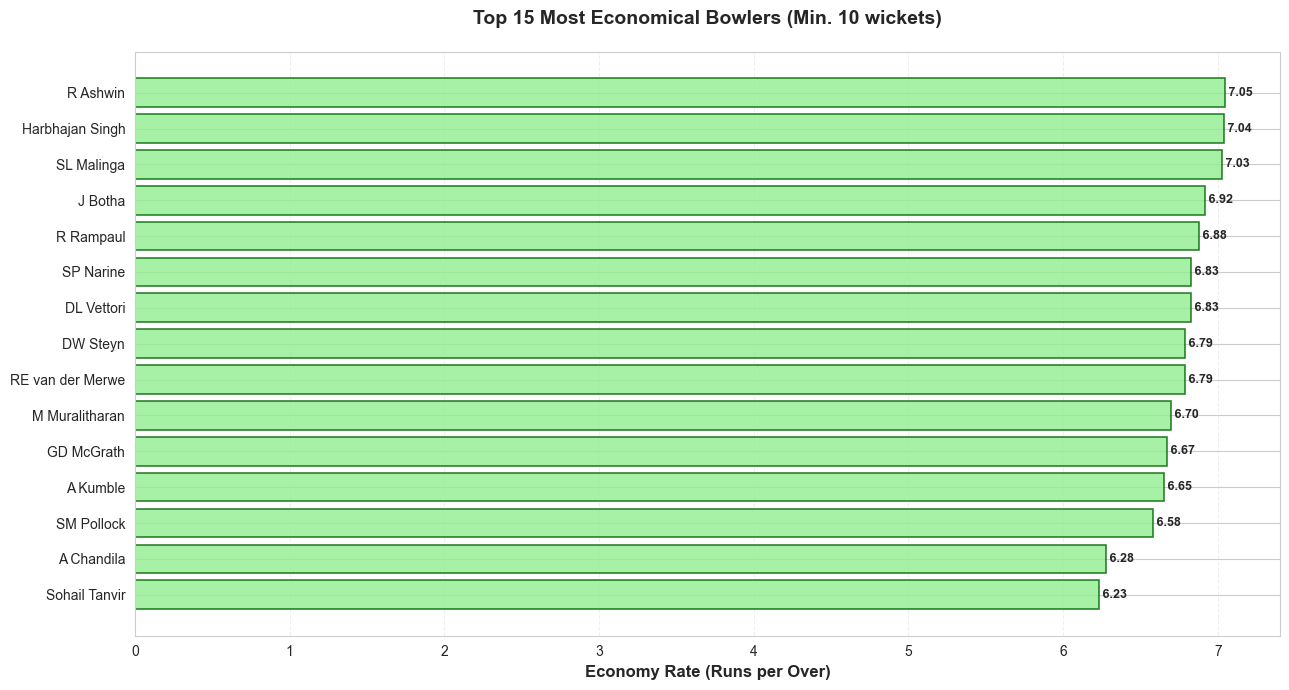


📊 KEY INSIGHTS:
- Most economical bowler: Sohail Tanvir (6.23 runs/over)
- Economy rate reflects bowling control and effectiveness.
- Lower economy rates are crucial for match-winning performances.


In [12]:
# Calculate economy rate for bowlers with at least 10 wickets
# Economy = runs conceded per over (6 deliveries)
bowler_stats = df.groupby('bowler').agg({
    'runs_total': 'sum',      # Total runs conceded (runs + extras)
    'match_id': 'count',      # Total deliveries
    'wickets': 'sum'          # Total wickets
}).reset_index()
bowler_stats.columns = ['bowler', 'runs_conceded', 'deliveries', 'wickets_taken']

# Calculate economy rate
# Overs = deliveries / 6 (since 6 balls = 1 over)
bowler_stats['overs'] = bowler_stats['deliveries'] / 6
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / bowler_stats['overs']).round(2)

# Filter for bowlers with at least 10 wickets
bowler_stats_filtered = bowler_stats[bowler_stats['wickets_taken'] >= 10].sort_values('economy').head(15)

# Create visualization
fig, ax = plt.subplots(figsize=(13, 7))

# Use explicit NumPy arrays to avoid ArrayLike / ExtensionArray type issues
y_pos = np.arange(len(bowler_stats_filtered), dtype=float)
economy_vals = bowler_stats_filtered['economy'].to_numpy(dtype=float)

bars = ax.barh(
    y=y_pos,
    width=economy_vals,
    color='lightgreen',
    edgecolor='darkgreen',
    alpha=0.8,
    linewidth=1.2
)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {width:.2f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

# Styling
ax.set_yticks(range(len(bowler_stats_filtered)))
ax.set_yticklabels(bowler_stats_filtered['bowler'])
ax.set_xlabel('Economy Rate (Runs per Over)', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Most Economical Bowlers (Min. 10 wickets)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print insights
print("\n📊 KEY INSIGHTS:")
print(f"- Most economical bowler: {bowler_stats_filtered.iloc[0]['bowler']} ({bowler_stats_filtered.iloc[0]['economy']:.2f} runs/over)")
print(f"- Economy rate reflects bowling control and effectiveness.")
print(f"- Lower economy rates are crucial for match-winning performances.")

---
## 7. Strategic Analysis

Let's explore strategic factors like toss impact, venue patterns, and match dynamics.

### 7.1 Does Toss Impact Match Outcome?

Does winning the toss influence the probability of winning the match?

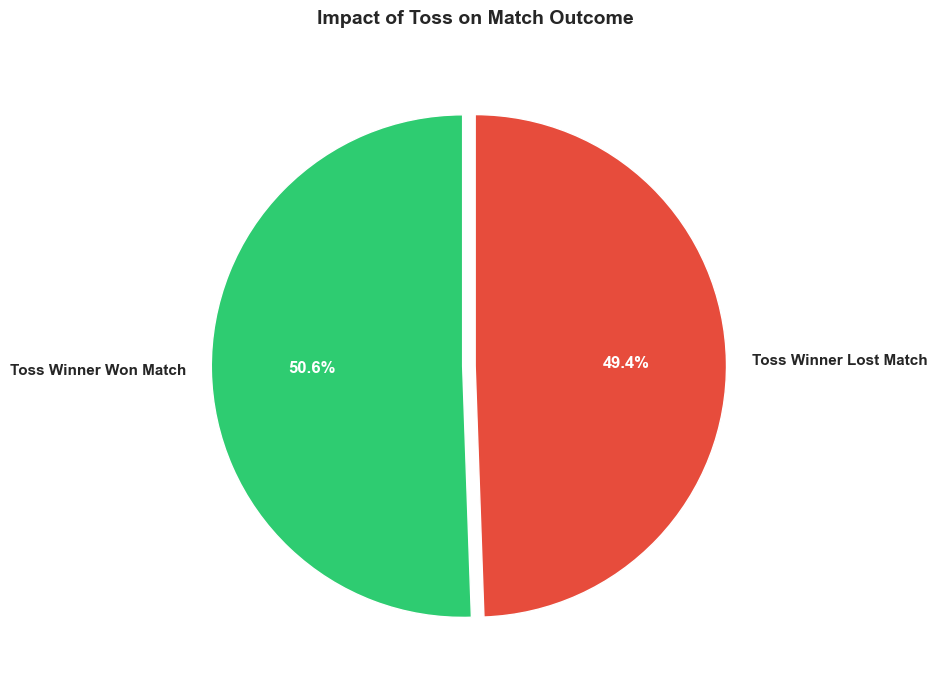


📊 KEY INSIGHTS:
- Toss winners won 50.6% of their matches
- This is slightly above 50%, showing a modest toss advantage.
- Team strength still matters more than toss in determining outcomes.


In [13]:
# Get unique matches with toss and match result information
match_data = df.drop_duplicates(subset=['match_id'])[['match_id', 'toss_winner', 'winning_team']].copy()

# Determine if toss winner also won the match
match_data['toss_winner_won'] = match_data['toss_winner'] == match_data['winning_team']

# Calculate outcomes
toss_won_match = match_data['toss_winner_won'].sum()
toss_lost_match = (~match_data['toss_winner_won']).sum()

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 7))

sizes = [toss_won_match, toss_lost_match]
labels = ['Toss Winner Won Match', 'Toss Winner Lost Match']
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0)

pie_result = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 11, 'weight': 'bold'}
)

wedges, texts = pie_result[:2]
autotexts = pie_result[2] if len(pie_result) > 2 else []

ax.set_title('Impact of Toss on Match Outcome', fontsize=14, fontweight='bold', pad=20)

# Make percentage text more visible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

# Print insights
total_matches = len(match_data)
toss_win_pct = (toss_won_match / total_matches * 100)
print("\n📊 KEY INSIGHTS:")
print(f"- Toss winners won {toss_win_pct:.1f}% of their matches")
print(f"- This is slightly above 50%, showing a modest toss advantage.")
print(f"- Team strength still matters more than toss in determining outcomes.")

### 7.2 Runs Distribution Across Innings

How are runs distributed between first and second innings?

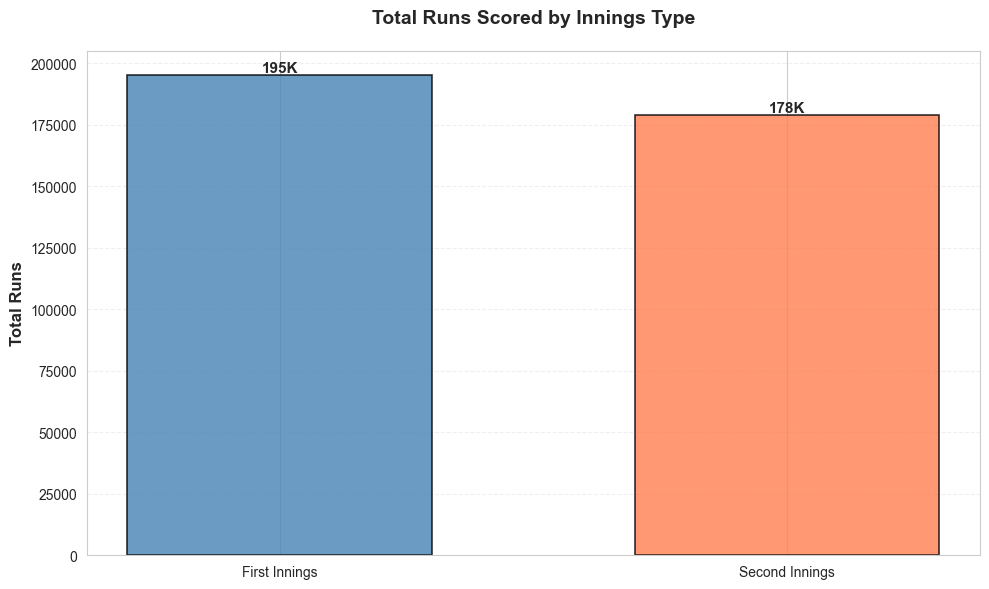


📊 KEY INSIGHTS:
- First innings total: 195K runs (52.2%)
- Second innings total: 178K runs (47.8%)
- Similar distribution shows balanced play in both innings.


In [14]:
# Calculate total runs scored in each innings across all matches
innings_runs = df.groupby('innings')['runs_total'].sum()

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(['First Innings', 'Second Innings'],
               [innings_runs.get(1, 0), innings_runs.get(2, 0)],
               color=['steelblue', 'coral'],
               edgecolor='black',
               alpha=0.8,
               linewidth=1.2,
               width=0.6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height/1000):.0f}K',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Styling
ax.set_ylabel('Total Runs', fontsize=12, fontweight='bold')
ax.set_title('Total Runs Scored by Innings Type', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print insights
first_innings = innings_runs.get(1, 0)
second_innings = innings_runs.get(2, 0)
total = first_innings + second_innings
print("\n📊 KEY INSIGHTS:")
print(f"- First innings total: {int(first_innings/1000):.0f}K runs ({(first_innings/total*100):.1f}%)")
print(f"- Second innings total: {int(second_innings/1000):.0f}K runs ({(second_innings/total*100):.1f}%)")
print(f"- Similar distribution shows balanced play in both innings.")

### 7.3 Most Active Venues

Which venues host the most IPL matches?

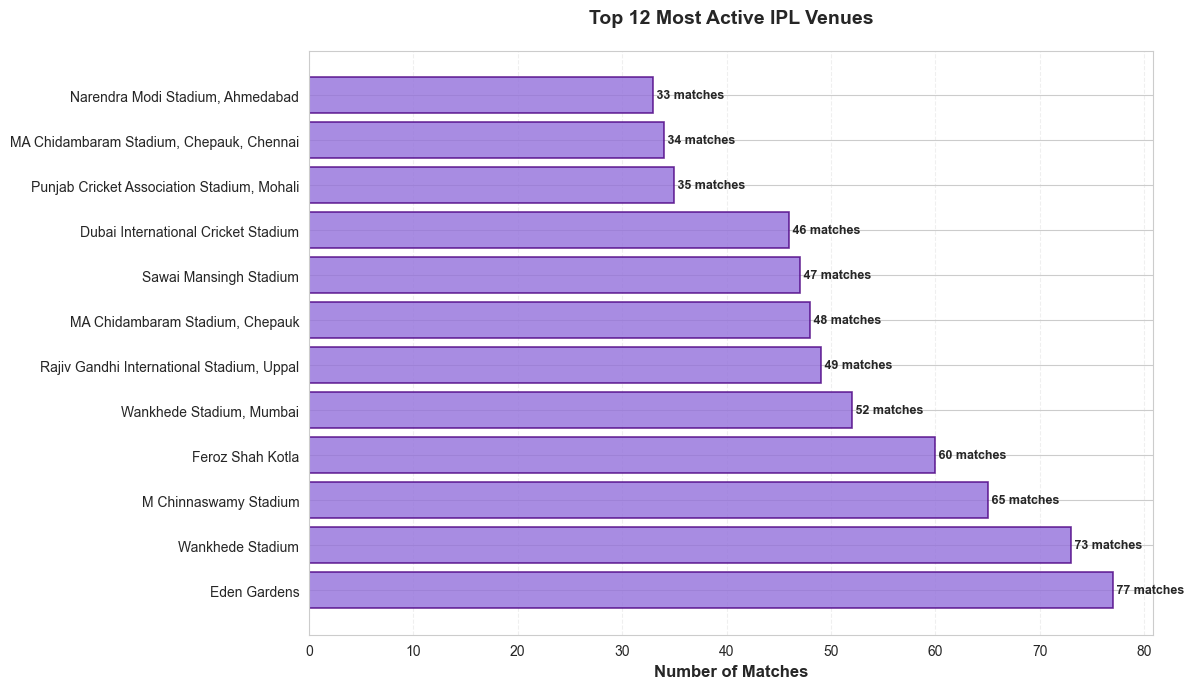


📊 KEY INSIGHTS:
- Most active venue: Eden Gardens (77 matches)
- Established venues become iconic IPL destinations.
- Home advantage may benefit local teams at familiar grounds.


In [15]:
# Count unique matches by venue
venue_counts = df.groupby('venue')['match_id'].nunique().sort_values(ascending=False).head(12)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Use explicit NumPy arrays for static type-checker compatibility
y_pos = np.arange(len(venue_counts), dtype=float)
venue_vals = venue_counts.to_numpy(dtype=float)

bars = ax.barh(
    y=y_pos,
    width=venue_vals,
    color='mediumpurple',
    edgecolor='indigo',
    alpha=0.8,
    linewidth=1.2
)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(width)} matches',
            ha='left', va='center', fontsize=9, fontweight='bold')

# Styling
ax.set_yticks(range(len(venue_counts)))
ax.set_yticklabels(venue_counts.index)
ax.set_xlabel('Number of Matches', fontsize=12, fontweight='bold')
ax.set_title('Top 12 Most Active IPL Venues', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print insights
print("\n📊 KEY INSIGHTS:")
print(f"- Most active venue: {venue_counts.index[0]} ({venue_counts.values[0]} matches)")
print(f"- Established venues become iconic IPL destinations.")
print(f"- Home advantage may benefit local teams at familiar grounds.")


3.1 TOP 10 BATSMEN (ALL-TIME)

Top 5 Batsmen:
  V Kohli: 8671 runs (SR: 133.3)
  RG Sharma: 7048 runs (SR: 132.6)
  S Dhawan: 6769 runs (SR: 127.6)
  DA Warner: 6567 runs (SR: 140.3)
  SK Raina: 5536 runs (SR: 137.5)

Strike rate range: 125.14-152.38


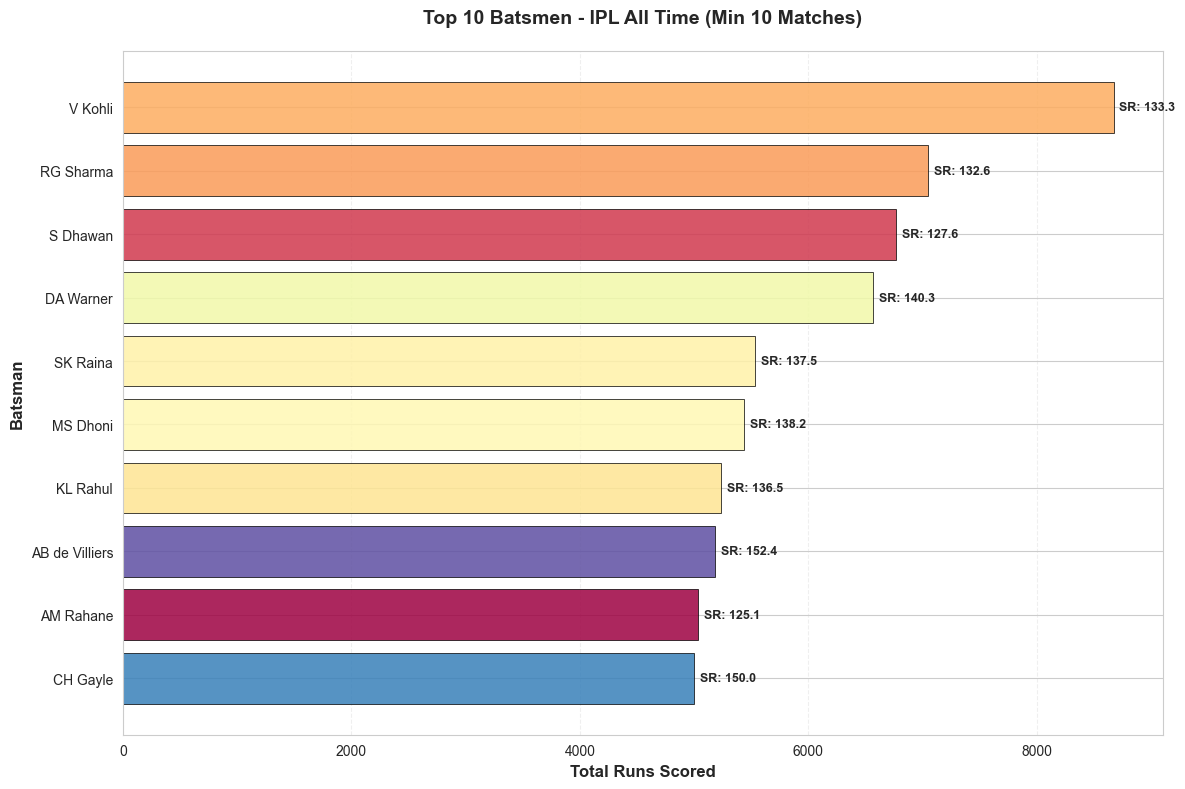


📊 KEY INSIGHTS:
- Highest run-scorer: V Kohli (8671 runs in 259 matches).
- Fastest scorer among top 10: AB de Villiers (SR 152.4).
- Best runs-per-match among top 10: KL Rahul (38.78 runs/match).
- Top batters combine longevity (matches), volume (runs), and efficiency (strike rate).


In [16]:
from matplotlib.colors import Normalize

# 3.1 Top 10 Batsmen
print("\n3.1 TOP 10 BATSMEN (ALL-TIME)")
print("=" * 80)

# Handle schema differences safely
runs_col = 'runs_off_bat' if 'runs_off_bat' in ipl.columns else 'runs_batter'
total_col = 'total_runs' if 'total_runs' in ipl.columns else ('runs_total' if 'runs_total' in ipl.columns else None)
balls_col = 'valid_ball' if 'valid_ball' in ipl.columns else 'ball'

agg_spec = {
    runs_col: 'sum',
    balls_col: 'sum' if balls_col == 'valid_ball' else 'count',
    'match_id': 'nunique'
}
if total_col:
    agg_spec[total_col] = 'sum'

batsmen_stats = ipl.groupby('batter').agg(agg_spec).reset_index()

# Standardize column names
rename_map = {
    runs_col: 'runs_off_bat',
    balls_col: 'balls',
    'match_id': 'matches'
}
if total_col:
    rename_map[total_col] = 'total_runs'
batsmen_stats = batsmen_stats.rename(columns=rename_map)

if 'total_runs' not in batsmen_stats.columns:
    batsmen_stats['total_runs'] = batsmen_stats['runs_off_bat']

# Filters + metrics
batsmen_stats = batsmen_stats[batsmen_stats['matches'] >= 10].copy()
batsmen_stats['strike_rate'] = (batsmen_stats['runs_off_bat'] / batsmen_stats['balls'] * 100).round(2)
batsmen_stats['avg_runs'] = (batsmen_stats['runs_off_bat'] / batsmen_stats['matches']).round(2)

top_batsmen = batsmen_stats.sort_values('runs_off_bat', ascending=False).head(10)

print("\nTop 5 Batsmen:")
for _, row in top_batsmen.head(5).iterrows():
    print(f"  {row['batter']}: {row['runs_off_bat']:.0f} runs (SR: {row['strike_rate']:.1f})")

print(f"\nStrike rate range: {top_batsmen['strike_rate'].min():.2f}-{top_batsmen['strike_rate'].max():.2f}")

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))

cmap = plt.get_cmap('Spectral')  # fixes cm.Spectral attribute warning
norm = Normalize(
    vmin=float(top_batsmen['strike_rate'].min()),
    vmax=float(top_batsmen['strike_rate'].max())
)
bar_colors = cmap(norm(top_batsmen['strike_rate'].to_numpy(dtype=float)))

bars = ax.barh(
    top_batsmen['batter'],
    top_batsmen['runs_off_bat'],
    color=bar_colors,
    alpha=0.85,
    edgecolor='black',
    linewidth=0.6
)

for i, (_, row) in enumerate(top_batsmen.iterrows()):
    ax.text(row['runs_off_bat'] + 50, i, f"SR: {row['strike_rate']:.1f}", va='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Total Runs Scored', fontsize=12, fontweight='bold')
ax.set_ylabel('Batsman', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Batsmen - IPL All Time (Min 10 Matches)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Key insights
leader = top_batsmen.iloc[0]
best_sr_top10 = top_batsmen.loc[top_batsmen['strike_rate'].idxmax()]
most_consistent = top_batsmen.loc[top_batsmen['avg_runs'].idxmax()]

print("\n📊 KEY INSIGHTS:")
print(f"- Highest run-scorer: {leader['batter']} ({leader['runs_off_bat']:.0f} runs in {leader['matches']} matches).")
print(f"- Fastest scorer among top 10: {best_sr_top10['batter']} (SR {best_sr_top10['strike_rate']:.1f}).")
print(f"- Best runs-per-match among top 10: {most_consistent['batter']} ({most_consistent['avg_runs']:.2f} runs/match).")
print("- Top batters combine longevity (matches), volume (runs), and efficiency (strike rate).")



3.2 TOP 10 BOWLERS (ALL-TIME)

Top 5 Bowlers:
  YS Chahal: 221 wickets (ER: 8.09)
  B Kumar: 198 wickets (ER: 7.87)
  SP Narine: 192 wickets (ER: 6.93)
  PP Chawla: 192 wickets (ER: 8.07)
  R Ashwin: 187 wickets (ER: 7.29)

Economy rate range: 6.93-8.53


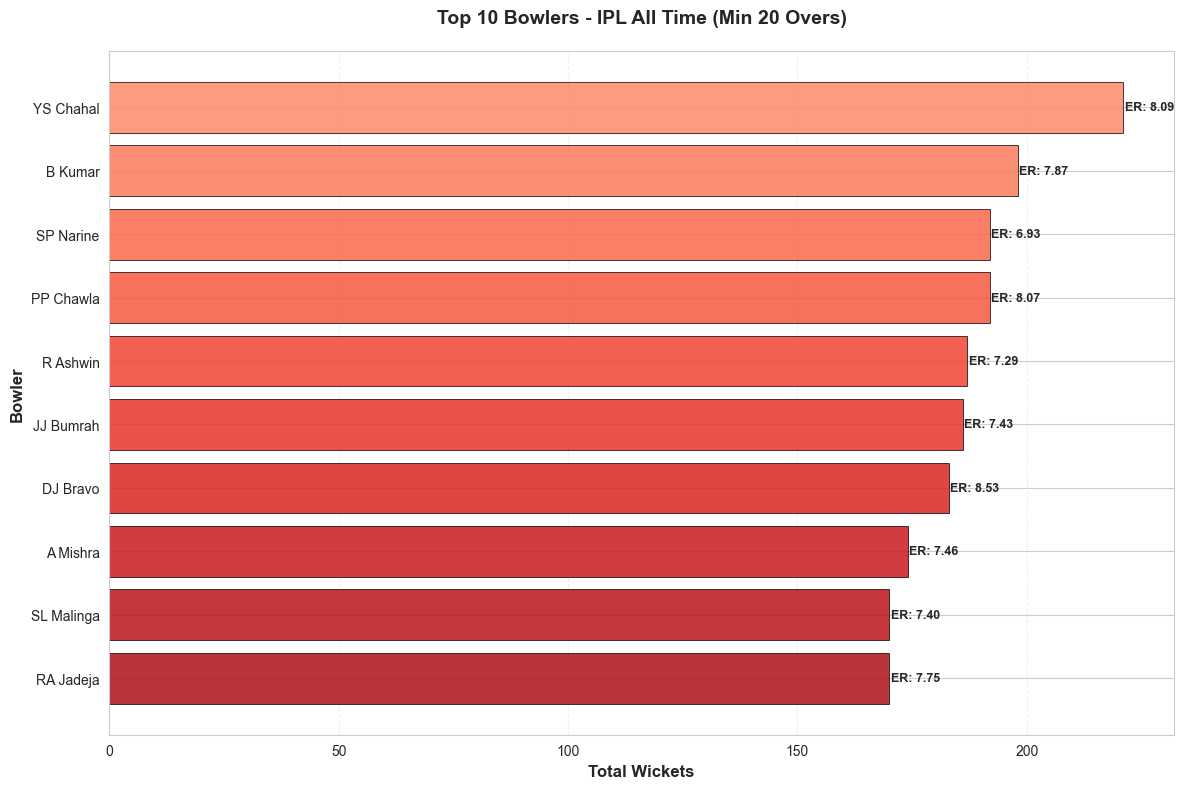


📊 KEY INSIGHTS:
- Highest wicket-taker: YS Chahal (221 wickets in 172 matches).
- Best economy among top 10: SP Narine (ER 6.93).
- Best wickets-per-match among top 10: SL Malinga (1.39 wickets/match).
- Top bowlers combine wicket-taking consistency with economy control.


In [26]:
# 3.2 Top 10 Bowlers
print("\n3.2 TOP 10 BOWLERS (ALL-TIME)")
print("=" * 80)

# Resolve schema safely
runs_col = (
    'runs_total' if 'runs_total' in ipl.columns
    else 'total_runs' if 'total_runs' in ipl.columns
    else 'runs_bowler' if 'runs_bowler' in ipl.columns
    else None
)
wickets_col = (
    'bowler_wicket' if 'bowler_wicket' in ipl.columns
    else 'wickets' if 'wickets' in ipl.columns
    else None
)

if runs_col is None or wickets_col is None:
    raise KeyError("Required bowling columns are missing in dataset.")

# Legal deliveries preferred for overs; fallback to row count
if 'valid_ball' in ipl.columns:
    bowler_deliveries = (
        ipl.groupby('bowler', as_index=False)
           .agg(deliveries=('valid_ball', 'sum'))
    )
else:
    bowler_deliveries = (
        ipl.groupby('bowler')
           .size()
           .rename('deliveries')
           .reset_index()
    )

bowler_deliveries['overs'] = bowler_deliveries['deliveries'] / 6

bowlers_stats = (
    ipl.groupby('bowler', as_index=False)
       .agg(
           runs_conceded=(runs_col, 'sum'),
           wickets=(wickets_col, 'sum'),
           matches=('match_id', 'nunique')
       )
       .merge(bowler_deliveries[['bowler', 'deliveries', 'overs']], on='bowler', how='left')
)

bowlers_stats = bowlers_stats[bowlers_stats['overs'] >= 20].copy()  # Min 20 overs
bowlers_stats['economy'] = bowlers_stats['runs_conceded'] / bowlers_stats['overs']
bowlers_stats['avg_wickets'] = bowlers_stats['wickets'] / bowlers_stats['matches']

top_bowlers = bowlers_stats.sort_values('wickets', ascending=False).head(10)

print("\nTop 5 Bowlers:")
for _, row in top_bowlers.head(5).iterrows():
    print(f"  {row['bowler']}: {row['wickets']:.0f} wickets (ER: {row['economy']:.2f})")

print(f"\nEconomy rate range: {top_bowlers['economy'].min():.2f}-{top_bowlers['economy'].max():.2f}")

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))

cmap = plt.get_cmap('Reds')  # fixes cm.Reds attribute issue
bar_colors = cmap(np.linspace(0.4, 0.85, len(top_bowlers)))

y_pos = np.arange(len(top_bowlers), dtype=float)
wicket_vals = top_bowlers['wickets'].to_numpy(dtype=float)

bars = ax.barh(
    y=y_pos,
    width=wicket_vals,
    color=bar_colors,
    alpha=0.85,
    edgecolor='black',
    linewidth=0.6
)

for i, (_, row) in enumerate(top_bowlers.iterrows()):
    ax.text(row['wickets'] + 0.3, i, f"ER: {row['economy']:.2f}", va='center', fontsize=9, fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(top_bowlers['bowler'])
ax.set_xlabel('Total Wickets', fontsize=12, fontweight='bold')
ax.set_ylabel('Bowler', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Bowlers - IPL All Time (Min 20 Overs)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Key insights
if not top_bowlers.empty:
    leader = top_bowlers.iloc[0]
    best_economy = top_bowlers.loc[top_bowlers['economy'].idxmin()]
    best_strike = top_bowlers.loc[top_bowlers['avg_wickets'].idxmax()]

    print("\n📊 KEY INSIGHTS:")
    print(f"- Highest wicket-taker: {leader['bowler']} ({leader['wickets']:.0f} wickets in {leader['matches']} matches).")
    print(f"- Best economy among top 10: {best_economy['bowler']} (ER {best_economy['economy']:.2f}).")
    print(f"- Best wickets-per-match among top 10: {best_strike['bowler']} ({best_strike['avg_wickets']:.2f} wickets/match).")
    print("- Top bowlers combine wicket-taking consistency with economy control.")
else:
    print("\n📊 KEY INSIGHTS:")
    print("- No bowlers met the minimum overs threshold.")


3.3 BOWLER SCATTER PLOT: ECONOMY VS WICKETS

Bowlers analyzed: 332


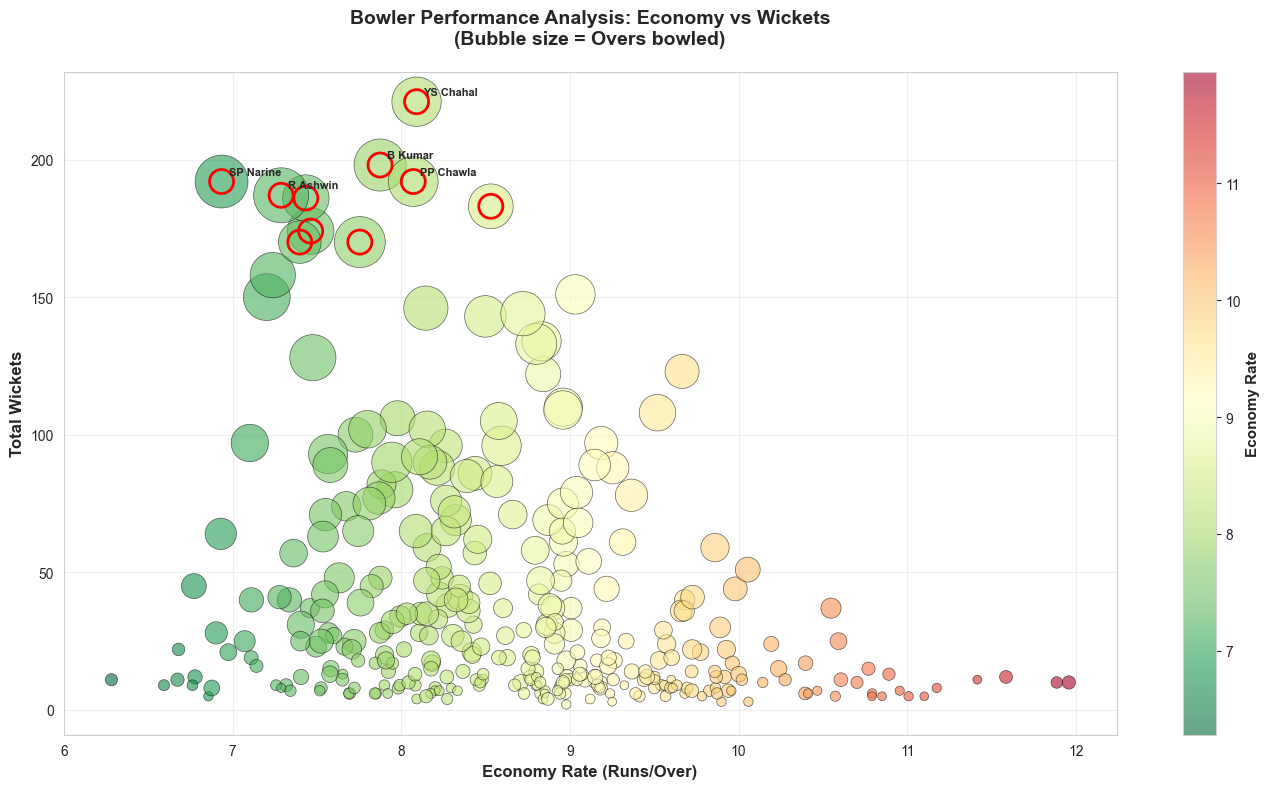

✓ Chart created


In [18]:
# 3.3 Bowler Performance Scatter Plot
print("\n3.3 BOWLER SCATTER PLOT: ECONOMY VS WICKETS")
print("="*80)

# All bowlers with 20+ overs
context = bowlers_stats[bowlers_stats['overs'] >= 20]

print(f"\nBowlers analyzed: {len(context)}")

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))

scatter = ax.scatter(context['economy'], context['wickets'],
                    s=context['overs']*2, alpha=0.6, c=context['economy'],
                    cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)

# Highlight top 10
for idx, (_, row) in enumerate(top_bowlers.iterrows()):
    ax.scatter(row['economy'], row['wickets'], s=300, facecolors='none',
              edgecolors='red', linewidth=2)
    if idx < 5:  # Label top 5 to avoid clutter
        ax.annotate(row['bowler'], xy=(row['economy'], row['wickets']),
                   xytext=(5, 5), textcoords='offset points', fontsize=8, fontweight='bold')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Economy Rate', fontsize=11, fontweight='bold')

ax.set_xlabel('Economy Rate (Runs/Over)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Wickets', fontsize=12, fontweight='bold')
ax.set_title('Bowler Performance Analysis: Economy vs Wickets\n(Bubble size = Overs bowled)',
            fontsize=14, fontweight='bold', pad=20)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Key insights
best_economy = context.loc[context['economy'].idxmin()]
most_wickets = context.loc[context['wickets'].idxmax()]

# Simple balance score: wickets per economy point (higher is better)
context_scored = context.copy()
context_scored['balance_score'] = context_scored['wickets'] / context_scored['economy']
best_balance = context_scored.loc[context_scored['balance_score'].idxmax()]

print("\n📊 KEY INSIGHTS:")
print(f"- Best economy (20+ overs): {best_economy['bowler']} ({best_economy['economy']:.2f})")
print(f"- Most wickets (20+ overs): {most_wickets['bowler']} ({int(most_wickets['wickets'])} wickets)")
print(f"- Best wickets/economy balance: {best_balance['bowler']} (score: {best_balance['balance_score']:.2f})")
print("✓ Chart created")


4.1 RUNS DISTRIBUTION BY OVER PHASE

Average Runs per Over:
  PowerPlay (1-6): 7.97 runs/over
  Middle (7-15): 7.87 runs/over
  Death (16-20): 10.02 runs/over


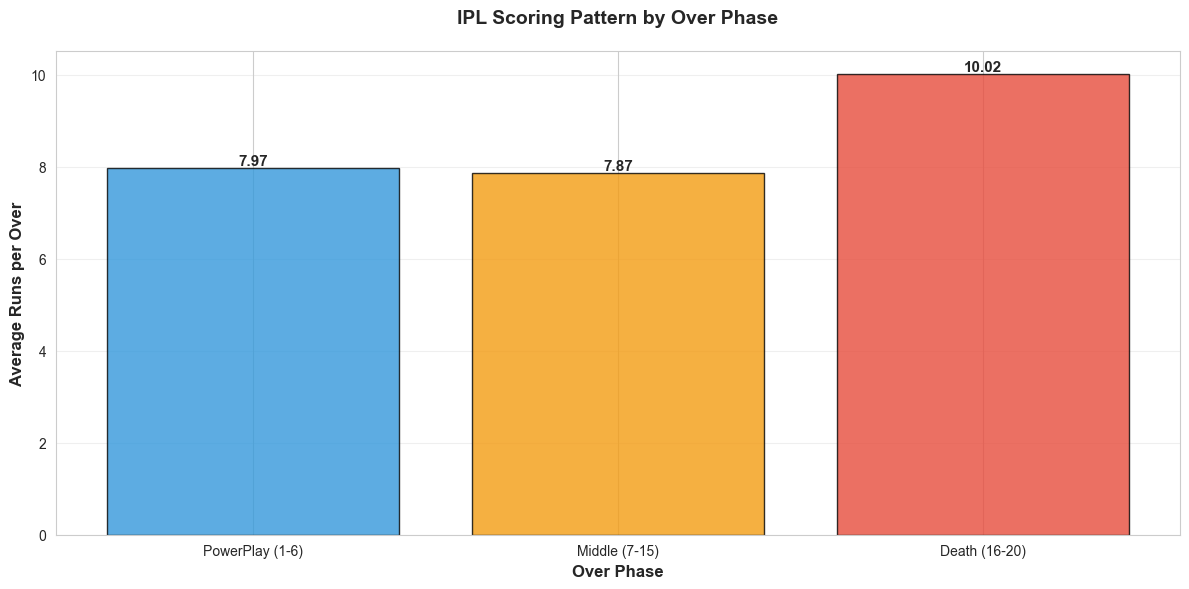


📊 KEY INSIGHTS:
- Highest scoring phase: Death (16-20) (10.02 runs/over)
- Lowest scoring phase: Middle (7-15) (7.87 runs/over)
- Scoring jump between lowest and highest phase: 2.15 runs/over
- Death overs show clear acceleration in IPL scoring patterns.
✓ Chart created


In [27]:
# 4.1 Runs Distribution by Over Phase
print("\n4.1 RUNS DISTRIBUTION BY OVER PHASE")
print("=" * 80)

def assign_phase(over_num):
    # 'over' is 0-based in this dataset (0-19)
    if over_num < 6:
        return 'PowerPlay (1-6)'
    elif over_num < 15:
        return 'Middle (7-15)'
    else:
        return 'Death (16-20)'

ipl['phase'] = ipl['over'].apply(assign_phase)

# Resolve runs column safely
if 'total_runs' in ipl.columns:
    runs_col = 'total_runs'
elif 'runs_total' in ipl.columns:
    runs_col = 'runs_total'
else:
    runs_col = None
    if {'runs_batter', 'runs_extras'}.issubset(ipl.columns):
        ipl['_tmp_total_runs'] = ipl['runs_batter'] + ipl['runs_extras']
        runs_col = '_tmp_total_runs'
    else:
        raise KeyError("No total runs column found. Expected one of: total_runs, runs_total.")

# Use legal balls if available for correct runs/over
if 'valid_ball' in ipl.columns:
    phase_runs = (
        ipl.groupby('phase')
           .agg(total_runs=(runs_col, 'sum'),
                balls=('valid_ball', 'sum'),
                deliveries=('match_id', 'count'))
           .reset_index()
    )
else:
    phase_runs = (
        ipl.groupby('phase')
           .agg(total_runs=(runs_col, 'sum'),
                balls=('match_id', 'count'),
                deliveries=('match_id', 'count'))
           .reset_index()
    )

phase_runs['overs'] = phase_runs['balls'] / 6
phase_runs['avg_runs'] = (phase_runs['total_runs'] / phase_runs['overs']).round(2)

phase_order = ['PowerPlay (1-6)', 'Middle (7-15)', 'Death (16-20)']
phase_runs['phase'] = pd.Categorical(phase_runs['phase'], categories=phase_order, ordered=True)
phase_runs = phase_runs.sort_values('phase')

print("\nAverage Runs per Over:")
for _, row in phase_runs.iterrows():
    print(f"  {row['phase']}: {row['avg_runs']:.2f} runs/over")

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
colors_phase = ['#3498DB', '#F39C12', '#E74C3C']
bars = ax.bar(
    phase_runs['phase'],
    phase_runs['avg_runs'],
    color=colors_phase,
    alpha=0.8,
    edgecolor='black',
    linewidth=1
)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Average Runs per Over', fontsize=12, fontweight='bold')
ax.set_xlabel('Over Phase', fontsize=12, fontweight='bold')
ax.set_title('IPL Scoring Pattern by Over Phase', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 KEY INSIGHTS:")
if not phase_runs.empty:
    top_phase = phase_runs.loc[phase_runs['avg_runs'].idxmax()]
    low_phase = phase_runs.loc[phase_runs['avg_runs'].idxmin()]
    diff = top_phase['avg_runs'] - low_phase['avg_runs']

    print(f"- Highest scoring phase: {top_phase['phase']} ({top_phase['avg_runs']:.2f} runs/over)")
    print(f"- Lowest scoring phase: {low_phase['phase']} ({low_phase['avg_runs']:.2f} runs/over)")
    print(f"- Scoring jump between lowest and highest phase: {diff:.2f} runs/over")
    print("- Death overs show clear acceleration in IPL scoring patterns.")

print("✓ Chart created")

# cleanup temp column if created
if '_tmp_total_runs' in ipl.columns:
    ipl.drop(columns=['_tmp_total_runs'], inplace=True)


4.2 CHASE SUCCESS ANALYSIS

Chase Success Rates:
  Low (<130): 54.7% (137 attempts)
  Medium (130-159): 52.5% (322 attempts)
  High (160+): 29.2% (705 attempts)

Overall chase success rate: 38.7%


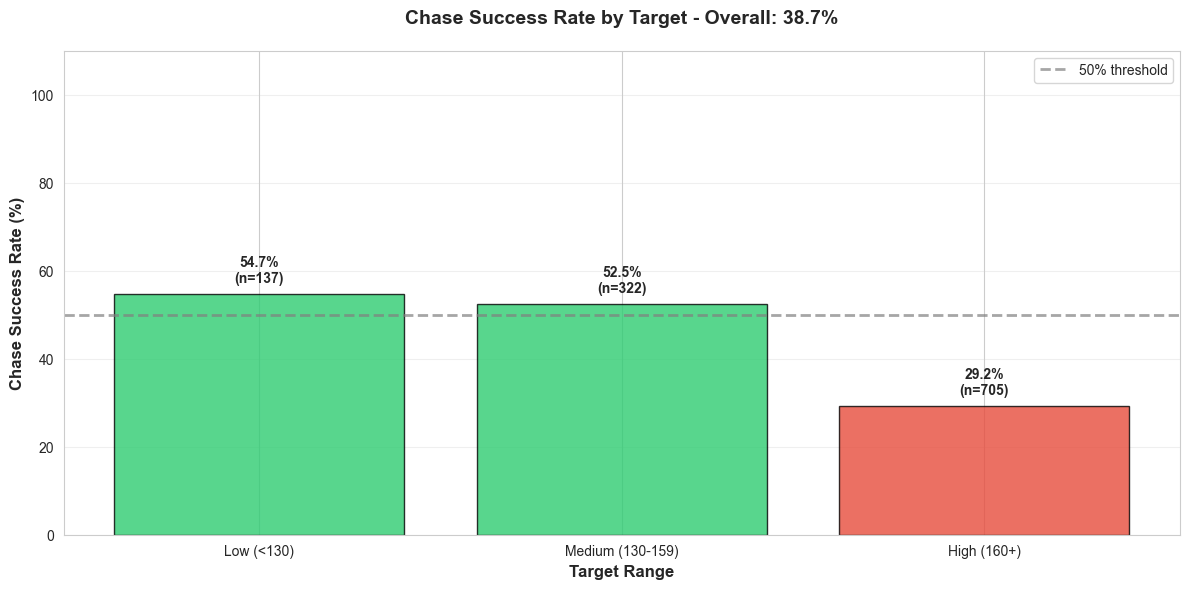


📊 KEY INSIGHTS:
- Overall chase success rate: 38.7%
- Easiest targets to chase: Low (<130) (54.7%)
- Toughest targets to chase: High (160+) (29.2%)
- Success-rate gap between easiest and toughest ranges: 25.5 percentage points
- Chasing gets significantly harder as target size increases.
✓ Chart created


In [28]:
# 4.2 Chase Success Analysis
print("\n4.2 CHASE SUCCESS ANALYSIS")
print("=" * 80)

# Get innings-level scores (use only regular innings 1 and 2)
match_innings = (
    ipl[ipl['innings'].isin([1, 2])]
    .groupby(['match_id', 'innings'], as_index=False)
    .agg(team_runs=('team_runs', 'max'), batting_team=('batting_team', 'first'))
)

# Split innings
first_inns = (
    match_innings[match_innings['innings'] == 1][['match_id', 'team_runs']]
    .rename(columns={'team_runs': 'target'})
)
second_inns = (
    match_innings[match_innings['innings'] == 2][['match_id', 'team_runs', 'batting_team']]
    .rename(columns={'team_runs': 'runs_chased'})
)

# Match winners (already available in notebook as matches_unique)
match_results = matches_unique[['match_id', 'winning_team']].rename(
    columns={'winning_team': 'match_won_by'}
)

# Build chase dataset
chase_data = first_inns.merge(second_inns, on='match_id', how='inner')
chase_data = chase_data.merge(match_results, on='match_id', how='left')
chase_data = chase_data.dropna(subset=['match_won_by'])

# Chase success: team batting second won match
chase_data['chase_successful'] = (chase_data['batting_team'] == chase_data['match_won_by']).astype(int)

def target_range(score):
    if score < 130:
        return 'Low (<130)'
    elif score < 160:
        return 'Medium (130-159)'
    return 'High (160+)'

chase_data['target_range'] = chase_data['target'].apply(target_range)

success_by_range = (
    chase_data.groupby('target_range', as_index=False)
    .agg(
        success_rate=('chase_successful', lambda x: x.mean() * 100),
        attempts=('match_id', 'count')
    )
)

# Keep logical order
range_order = ['Low (<130)', 'Medium (130-159)', 'High (160+)']
success_by_range['target_range'] = pd.Categorical(
    success_by_range['target_range'],
    categories=range_order,
    ordered=True
)
success_by_range = success_by_range.sort_values('target_range')

overall_success = chase_data['chase_successful'].mean() * 100

print("\nChase Success Rates:")
for _, row in success_by_range.iterrows():
    print(f"  {row['target_range']}: {row['success_rate']:.1f}% ({int(row['attempts'])} attempts)")

print(f"\nOverall chase success rate: {overall_success:.1f}%")

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
colors_success = ['#2ECC71' if sr > 50 else '#E74C3C' for sr in success_by_range['success_rate']]

bars = ax.bar(
    success_by_range['target_range'].astype(str),
    success_by_range['success_rate'],
    color=colors_success,
    alpha=0.8,
    edgecolor='black',
    linewidth=1
)

ax.axhline(y=50, color='gray', linestyle='--', linewidth=2, alpha=0.7, label='50% threshold')

for bar, attempts in zip(bars, success_by_range['attempts']):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f'{height:.1f}%\n(n={int(attempts)})',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

ax.set_ylabel('Chase Success Rate (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Target Range', fontsize=12, fontweight='bold')
ax.set_title(f'Chase Success Rate by Target - Overall: {overall_success:.1f}%', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, 110)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 KEY INSIGHTS:")
if not success_by_range.empty:
    best = success_by_range.loc[success_by_range['success_rate'].idxmax()]
    worst = success_by_range.loc[success_by_range['success_rate'].idxmin()]
    gap = best['success_rate'] - worst['success_rate']

    print(f"- Overall chase success rate: {overall_success:.1f}%")
    print(f"- Easiest targets to chase: {best['target_range']} ({best['success_rate']:.1f}%)")
    print(f"- Toughest targets to chase: {worst['target_range']} ({worst['success_rate']:.1f}%)")
    print(f"- Success-rate gap between easiest and toughest ranges: {gap:.1f} percentage points")
    print("- Chasing gets significantly harder as target size increases.")

print("✓ Chart created")

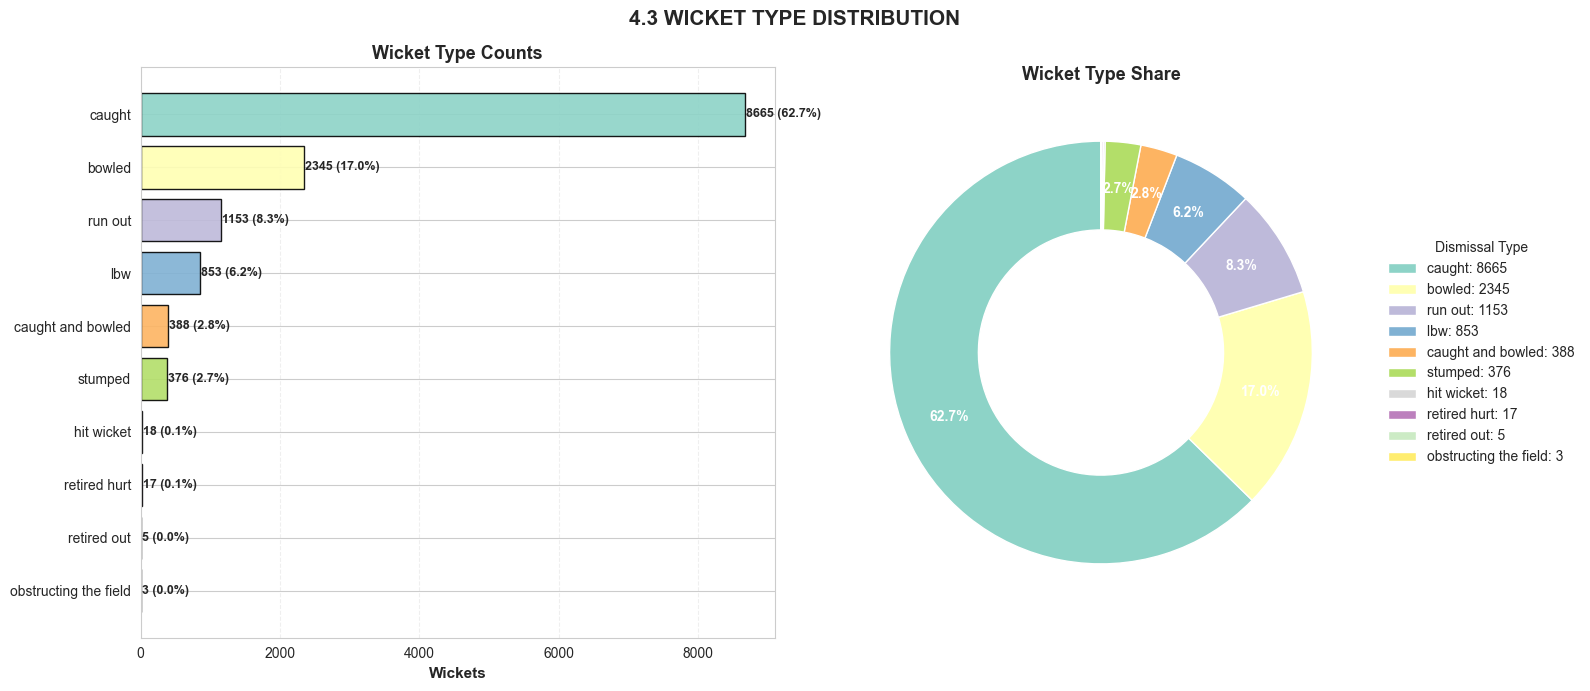


📊 KEY INSIGHTS:
- Most common dismissal: caught (8665, 62.7%).
- Least common dismissal: obstructing the field (3).
- Caught dismissals dominate wicket outcomes in IPL matches.
✓ Chart fixed


In [29]:
# Ensure wicket_data exists
if 'wicket_data' not in globals():
    source_df = df if 'df' in globals() else ipl
    wicket_col = 'dismissal_kind' if 'dismissal_kind' in source_df.columns else 'wicket_kind'
    wicket_data = (
        source_df[wicket_col]
        .dropna()
        .loc[lambda s: ~s.isin(['Not Applicable', 'N/A', ''])]  # remove non-dismissals
        .value_counts()
    )

# Visualization (fixed)
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(16, 7), gridspec_kw={'width_ratios': [1.2, 1]}
)

cmap_wicket = plt.get_cmap('Set3')
colors_wicket = cmap_wicket(np.linspace(0, 1, len(wicket_data)))  # no mcolors needed

# --- Left: horizontal bar chart ---
total_wickets = float(wicket_data.sum())
wicket_pct = np.round((wicket_data / total_wickets) * 100, 2)
bars = ax1.barh(
    wicket_data.index.astype(str),
    wicket_data.values,
    color=colors_wicket,
    edgecolor='black',
    alpha=0.9
)
ax1.invert_yaxis()
ax1.set_xlabel("Wickets", fontsize=11, fontweight='bold')
ax1.set_title("Wicket Type Counts", fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3, linestyle='--')

for bar, pct in zip(bars, np.asarray(wicket_pct, dtype=float)):
    ax1.text(
        float(bar.get_width()) + 20,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())} ({pct:.1f}%)",
        va='center',
        fontsize=9,
        fontweight='bold'
    )

# --- Right: donut chart ---
def autopct_func(p):
    return f"{p:.1f}%" if p >= 2 else ""

wedges, _, autotexts = ax2.pie(
    wicket_data.values,
    labels=None,
    colors=colors_wicket,
    startangle=90,
    autopct=autopct_func,
    pctdistance=0.78,
    wedgeprops=dict(width=0.42, edgecolor='white')
)

for t in autotexts:
    t.set_color("white")
    t.set_fontweight("bold")
    t.set_fontsize(10)

ax2.set_title("Wicket Type Share", fontsize=13, fontweight='bold')

legend_labels = [f"{k}: {v}" for k, v in wicket_data.items()]
ax2.legend(
    wedges,
    legend_labels,
    title="Dismissal Type",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

fig.suptitle("4.3 WICKET TYPE DISTRIBUTION", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 KEY INSIGHTS:")
if not wicket_data.empty:
    top_kind = wicket_data.index[0]
    top_count = int(wicket_data.iloc[0])
    top_share = float(wicket_pct.iloc[0]) # type: ignore

    least_kind = wicket_data.index[-1]
    least_count = int(wicket_data.iloc[-1])

    print(f"- Most common dismissal: {top_kind} ({top_count}, {top_share:.1f}%).")
    print(f"- Least common dismissal: {least_kind} ({least_count}).")
    print("- Caught dismissals dominate wicket outcomes in IPL matches.")

print("✓ Chart fixed")


2.1 HOME VS AWAY PERFORMANCE ANALYSIS

Average home advantage: 1.01%
Best home advantage: Rajasthan Royals (23.03%)


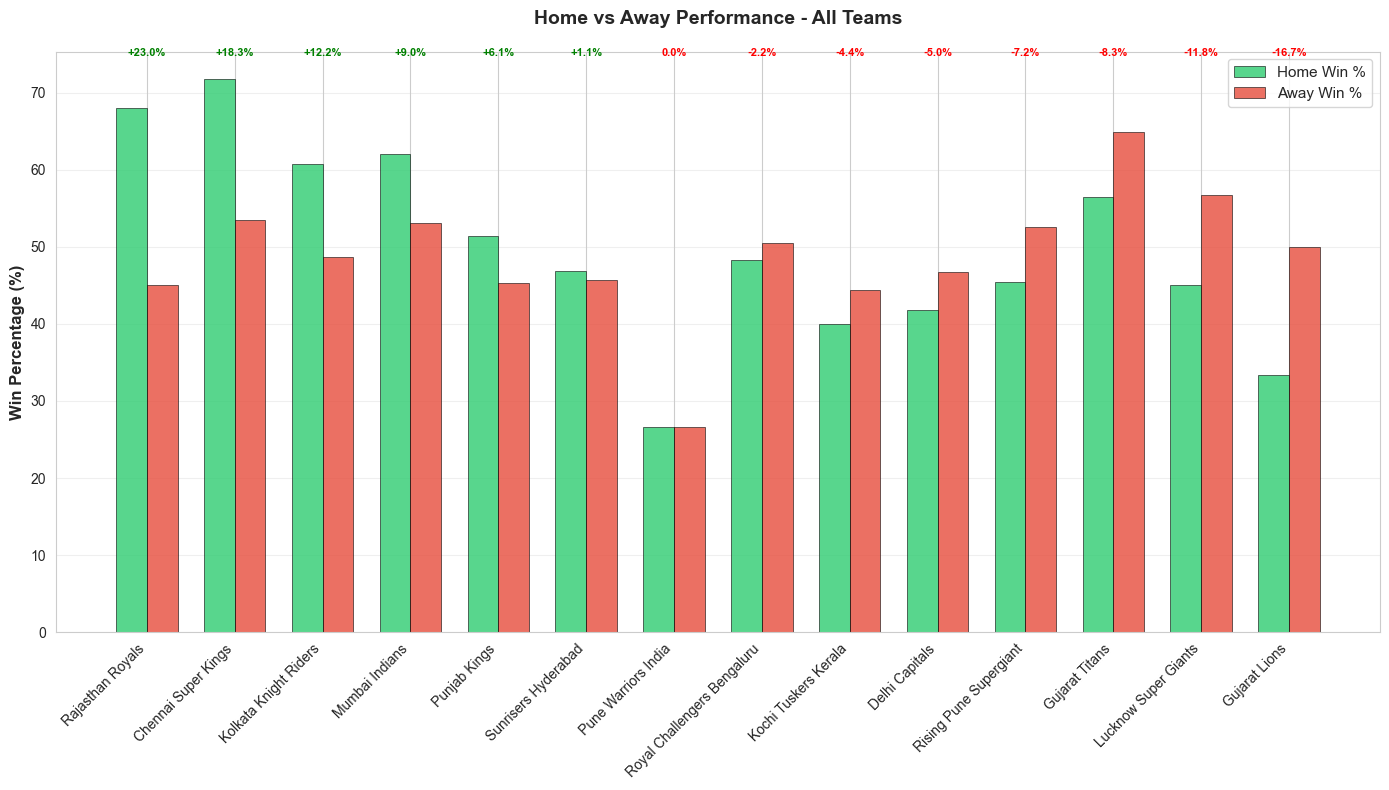

✓ Chart created


In [22]:
# 2.1 Home vs Away Performance
print("\n2.1 HOME VS AWAY PERFORMANCE ANALYSIS")
print("=" * 80)

# Build match-level team data (fix: match_level was undefined)
team_map = team_name_mapping if 'team_name_mapping' in globals() else {}

match_level = (
    ipl[['match_id', 'batting_team', 'venue', 'match_won_by']]
    .drop_duplicates(subset=['match_id', 'batting_team'])
    .copy()
)

# Standardize team names
match_level['batting_team'] = match_level['batting_team'].replace(team_map)
match_level['match_won_by'] = match_level['match_won_by'].replace(team_map)

# Remove rows with unknown/no-result winners
match_level = match_level[
    match_level['match_won_by'].notna() & (match_level['match_won_by'] != 'Unknown')
]

# Get team home venues
team_home_venues = {}
for team in sorted(match_level['batting_team'].unique()):
    team_venues = (
        match_level.loc[match_level['batting_team'].eq(team), ['venue']]
        .groupby('venue', dropna=True)
        .size()
        .sort_values(ascending=False)
    )
    if len(team_venues) > 0:
        team_home_venues[team] = team_venues.index[0]

# Calculate home vs away
home_away_stats = []
for team in sorted(match_level['batting_team'].unique()):
    if team not in team_home_venues:
        continue

    team_matches = match_level[match_level['batting_team'] == team]

    # Home matches
    home_matches = team_matches[team_matches['venue'] == team_home_venues[team]]
    home_wins = (home_matches['match_won_by'] == team).sum()
    home_total = len(home_matches)
    home_pct = (home_wins / home_total * 100) if home_total > 0 else 0

    # Away matches
    away_matches = team_matches[team_matches['venue'] != team_home_venues[team]]
    away_wins = (away_matches['match_won_by'] == team).sum()
    away_total = len(away_matches)
    away_pct = (away_wins / away_total * 100) if away_total > 0 else 0

    home_away_stats.append({
        'team': team,
        'home_wins': int(home_wins),
        'home_total': int(home_total),
        'home_win_pct': home_pct,
        'away_wins': int(away_wins),
        'away_total': int(away_total),
        'away_win_pct': away_pct,
        'home_advantage': home_pct - away_pct
    })

home_away_df = pd.DataFrame(home_away_stats).sort_values('home_advantage', ascending=False)

print(f"\nAverage home advantage: {home_away_df['home_advantage'].mean():.2f}%")
print(f"Best home advantage: {home_away_df.iloc[0]['team']} ({home_away_df.iloc[0]['home_advantage']:.2f}%)")

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(home_away_df))
width = 0.35

bars1 = ax.bar(
    x - width / 2, home_away_df['home_win_pct'], width,
    label='Home Win %', color='#2ECC71', alpha=0.8, edgecolor='black', linewidth=0.5
)
bars2 = ax.bar(
    x + width / 2, home_away_df['away_win_pct'], width,
    label='Away Win %', color='#E74C3C', alpha=0.8, edgecolor='black', linewidth=0.5
)

ax.set_ylabel('Win Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Home vs Away Performance - All Teams', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(home_away_df['team'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add advantage labels
y_top = max(home_away_df['home_win_pct'].max(), home_away_df['away_win_pct'].max()) + 3
for i, adv in enumerate(home_away_df['home_advantage']):
    ax.text(
        i, y_top,
        f'+{adv:.1f}%' if adv > 0 else f'{adv:.1f}%',
        ha='center', fontsize=8, fontweight='bold',
        color='green' if adv > 0 else 'red'
    )

plt.tight_layout()
plt.show()

print("✓ Chart created")


2.2 TEAM PERFORMANCE HEATMAP (BY SEASON)


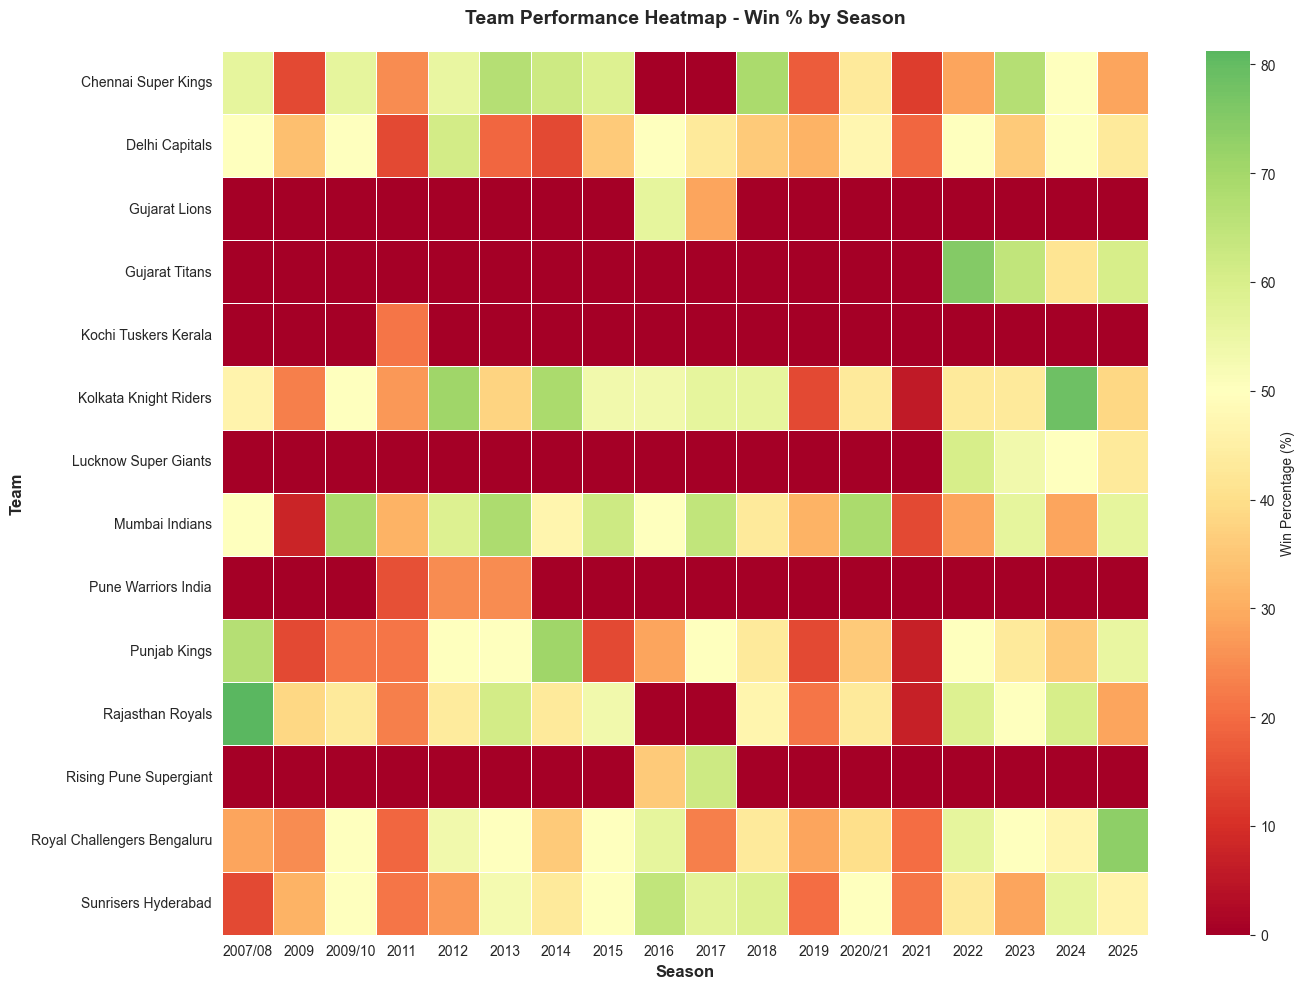

✓ Chart created


In [23]:
# 2.2 Team Performance Heatmap (By Season)
print("\n2.2 TEAM PERFORMANCE HEATMAP (BY SEASON)")
print("="*80)

# Use match-level unique rows from `ipl` (has both `season` and `match_won_by`)
season_team_wins = (
    ipl.drop_duplicates(subset=['match_id'])[['season', 'match_won_by']]
       .loc[lambda d: d['match_won_by'].notna() & (d['match_won_by'] != 'Unknown')]
       .groupby(['season', 'match_won_by'], as_index=False)
       .size()
       .rename(columns={'size': 'wins'})
)
season_team_matches = ipl.groupby(['season', 'batting_team']).size().reset_index(name='matches')

heatmap_data = []
# Normalize season dtype to avoid mixed int/str sorting errors
ipl['season'] = ipl['season'].astype(str).str.strip()
season_team_wins['season'] = season_team_wins['season'].astype(str).str.strip()

# Recompute matches at match-level (not ball-level)
season_team_matches = (
    ipl.drop_duplicates(subset=['match_id', 'batting_team'])
       .groupby(['season', 'batting_team'], as_index=False)
       .agg(matches=('match_id', 'nunique'))
)

# Fast lookup maps
wins_map = {(r['season'], r['match_won_by']): r['wins'] for _, r in season_team_wins.iterrows()}
matches_map = {(r['season'], r['batting_team']): r['matches'] for _, r in season_team_matches.iterrows()}

seasons = sorted(ipl['season'].dropna().unique())
teams = sorted(ipl['batting_team'].dropna().unique())

for season in seasons:
    season_data = {}
    for team in teams:
        matches_in_season = matches_map.get((season, team), 0)
        wins_in_season = wins_map.get((season, team), 0)
        season_data[team] = (wins_in_season / matches_in_season * 100) if matches_in_season > 0 else 0.0
    heatmap_data.append(season_data)

heatmap_df = pd.DataFrame(heatmap_data, index=sorted(ipl['season'].unique())).fillna(0)

# Visualization
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(heatmap_df.T, annot=False, fmt='.0f', cmap='RdYlGn', center=50,
           cbar_kws={'label': 'Win Percentage (%)'}, ax=ax, linewidths=0.5)
ax.set_xlabel('Season', fontsize=12, fontweight='bold')
ax.set_ylabel('Team', fontsize=12, fontweight='bold')
ax.set_title('Team Performance Heatmap - Win % by Season', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✓ Chart created")

---
## 8. Final Insights & Summary

Let's create a comprehensive summary of our findings.

### 8.1 Cumulative Runs Over Seasons

How has the total run scoring evolved across IPL seasons?

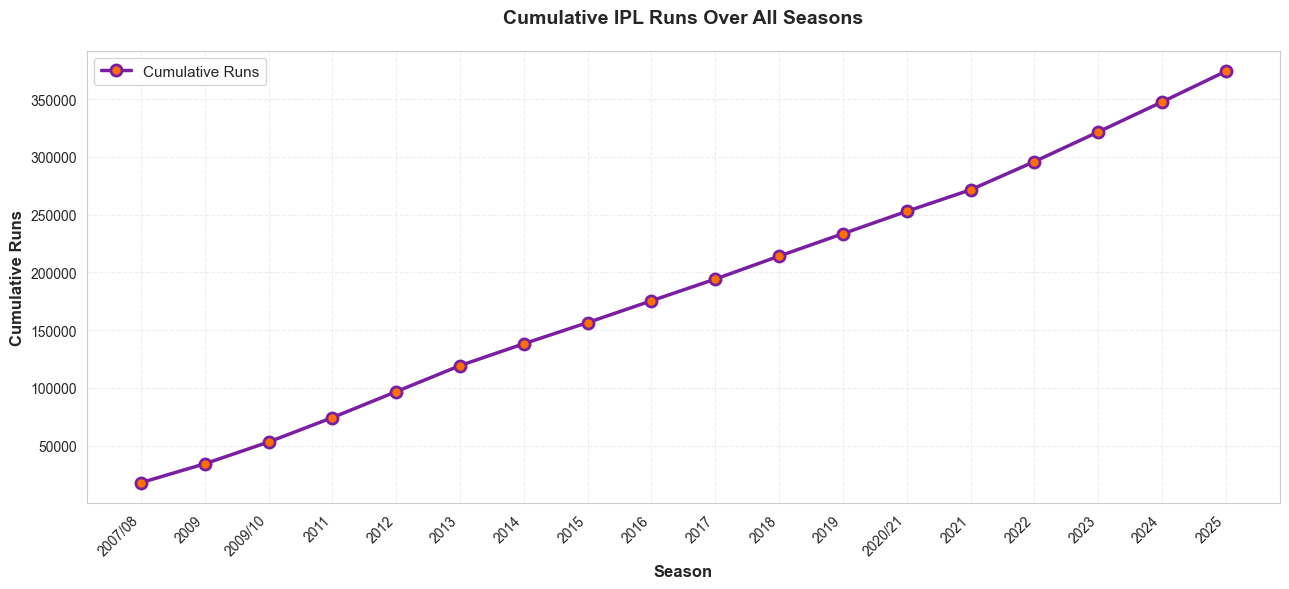


📊 KEY INSIGHTS:
- Steady growth in cumulative runs shows increased match volume over time.
- Total runs accumulated: 373K+ runs
- Growing trend indicates IPL's expansion and popularity.


In [24]:
# Calculate total runs by season (only regular innings)
season_runs = (
        df.loc[df['innings'].isin([1, 2]), ['season', 'runs_total']]
          .copy()
)

# Normalize season values to string to avoid mixed-type issues
season_runs['season'] = season_runs['season'].astype(str).str.strip()

# Aggregate runs per season label
season_runs = season_runs.groupby('season', as_index=False)['runs_total'].sum()

# Extract sortable year safely
season_runs['season_year'] = pd.to_numeric(
        season_runs['season'].str.extract(r'(\d{4})', expand=False),
        errors='coerce'
)

# Remove rows where year could not be extracted
season_runs = season_runs[season_runs['season_year'].notna()].copy()
season_runs['season_year'] = season_runs['season_year'].astype('int64')

# Sort chronologically
season_runs = season_runs.sort_values(['season_year', 'season']).reset_index(drop=True)

# Calculate cumulative runs
season_runs['cumulative_runs'] = season_runs['runs_total'].cumsum()

# Create line plot (explicit numpy arrays for type safety)
fig, ax = plt.subplots(figsize=(13, 6))

x_vals = np.arange(len(season_runs), dtype=float)
y_vals = season_runs['cumulative_runs'].to_numpy(dtype=float)

ax.plot(
        x_vals,
        y_vals,
        marker='o',
        linewidth=2.5,
        markersize=8,
        color='#7B1FA2',
        markerfacecolor='#FF6F00',
        markeredgecolor='#7B1FA2',
        markeredgewidth=2,
        label='Cumulative Runs'
)

# Styling
ax.set_xlabel('Season', fontsize=12, fontweight='bold')
ax.set_ylabel('Cumulative Runs', fontsize=12, fontweight='bold')
ax.set_title('Cumulative IPL Runs Over All Seasons', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_vals)
ax.set_xticklabels(season_runs['season'].tolist(), rotation=45, ha='right')
ax.grid(alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='upper left')

plt.tight_layout()
plt.show()

# Print insights
print("\n📊 KEY INSIGHTS:")
print("- Steady growth in cumulative runs shows increased match volume over time.")
print(f"- Total runs accumulated: {int(season_runs['cumulative_runs'].iloc[-1] / 1000):.0f}K+ runs")
print("- Growing trend indicates IPL's expansion and popularity.")

In [25]:
print("\n" + "="*80)
print("EXPORTING DATA")
print("="*80)

# Export cleaned dataset
ipl_export = ipl.drop('phase', axis=1)  # Remove temporary column
ipl_export.to_csv('ipl_cleaned_data.csv', index=False)
print("\n✓ Cleaned dataset exported: ipl_cleaned_data.csv")
print(f"  • Records: {len(ipl_export):,}")
print(f"  • Columns: {len(ipl_export.columns)}")

# Export summary statistics
# Ensure best_team exists (fix for undefined variable)
if 'best_team' not in globals():
    if 'top_team' in globals():
        best_team = top_team
    elif 'team_performance' in globals() and not team_performance.empty:
        best_team = team_performance.sort_values('win_percentage', ascending=False).iloc[0]
    else:
        best_team = pd.Series({'team': 'N/A', 'win_percentage': np.nan})

summary_stats = {
    'Metric': [
        'Total Matches', 'Total Ball Records', 'Seasons', 'Teams', 'Venues', 'Cities',
        'Batsmen (10+ matches)', 'Bowlers (20+ overs)', 'Overall Chase Success %',
        'Avg Home Advantage %', 'Best Team (Win %)', 'Top Batsman', 'Top Bowler'
    ],
    'Value': [
        match_level.shape[0],
        len(ipl),
        f"{ipl['season'].min()}-{ipl['season'].max()}",
        len(set(list(ipl['batting_team'].unique()) + list(ipl['bowling_team'].unique()))),
        ipl['venue'].nunique(),
        ipl['city'].nunique(),
        len(batsmen_stats),
        len(bowlers_stats),
        f"{overall_success:.1f}%",
        f"{home_away_df['home_advantage'].mean():.2f}%",
        f"{best_team['team']} ({best_team['win_percentage']:.1f}%)",
        f"{top_batsmen.iloc[0]['batter']} ({top_batsmen.iloc[0]['runs_off_bat']:.0f} runs)",
        f"{top_bowlers.iloc[0]['bowler']} ({top_bowlers.iloc[0]['wickets']:.0f} wickets)"
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('summary_statistics.csv', index=False)
print("\n✓ Summary statistics exported: summary_statistics.csv")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)
print("\nAll files have been exported successfully!")


EXPORTING DATA

✓ Cleaned dataset exported: ipl_cleaned_data.csv
  • Records: 278,205
  • Columns: 64

✓ Summary statistics exported: summary_statistics.csv

✅ ANALYSIS COMPLETE!

All files have been exported successfully!


---
## 9. Conclusion

### 🏆 Key Takeaways from Our Analysis:

**1. Competitive Balance**
- Multiple teams maintain strong win percentages
- IPL is a well-balanced league with no dominant team
- Season-to-season consistency in match numbers

**2. Individual Excellence**
- Top scorers accumulate runs through consistency and experience
- Different batting styles coexist (aggressive vs. steady)
- Bowling requires both control and wicket-taking ability

**3. Strategic Elements**
- Toss provides slight advantage but not decisive
- Venue familiarity matters but isn't determining factor
- Team composition and player form are crucial

**4. Trends & Growth**
- IPL has grown significantly since inception
- Run-scoring has increased with modern aggressive batting
- Venue infrastructure continues to improve

### 📈 What This Means:

✅ **For Teams:** Success requires consistent team performance, smart player selection, and adaptability  
✅ **For Players:** Excellence comes from focused practice and playing in high-pressure situations  
✅ **For Fans:** Unpredictability is what makes cricket exciting!  

### 🚀 This Analysis Demonstrates:

- **Data storytelling:** Converting numbers into meaningful insights
- **Data visualization:** Using charts to make patterns clear
- **Statistical thinking:** Comparing metrics that matter
- **Critical analysis:** Going beyond surface-level observations

### 📝 Interview-Ready Explanation:

"This IPL analysis shows how data science helps us understand sports performance. We started by cleaning and preparing the data, then explored patterns in team wins, individual player stats, and strategic factors like toss impact. By calculating metrics like win percentage, strike rate, and economy rate, we identified consistent performers and trends. The key insight is that while individual talent matters, sustained team success requires consistency and balance across batting and bowling units. This type of analysis can help teams make data-driven decisions about player selection and strategy."

---

**Thank you for exploring IPL data with this analysis!**

📊 **Tools & Techniques Used:**
- Data Cleaning & Preparation
- Exploratory Data Analysis (EDA)
- Data Aggregation & Grouping
- Statistical Calculations
- Data Visualization (Bar, Horizontal Bar, Pie, Line charts)

💡 **Key Metrics Calculated:**
- Win Percentage
- Strike Rate
- Economy Rate
- Cumulative Aggregations
- Frequency Distributions

🎯 **Best Practices Demonstrated:**
- Clear variable naming
- Meaningful comments
- Professional visualizations
- Data-driven insights
- Reproducible code

---